*First, make sure that you correctly installed all packages by running the following code block:*

In [125]:
from graph_utils.graph import Graph, nx, plt
from graph_utils.buss_graph import BussGraph
from graph_utils.tree_graph import TreeGraph
from graph_utils.ring_graph import RingGraph
from graph_utils.star_graph import StarGraph
from graph_utils.grid_graph import GridGraph
from graph_utils.mesh_graph import MeshGraph
from graph_utils.constructed_graph import ConstructedGraph
from graph_utils.watts_strogatz import WattsStrogatz
from graph_utils.barabasi_albert import BarabasiAlbert
from graph_utils.real_network_graph import RealNetworkGraph
from graph_utils.vdes_graph import VDESGraph
from graph_utils.get_network import get_network
import matplotlib
import numpy as np
import random

*Please go through the introduction notebook. All tools that you need are explained there.*

In [126]:
student_seed = 10103
random.seed(student_seed)

# Introduction
In this exercise shall we learn about different ways to measure the importance or centrality of a node in a network. We will furthermore encounter different graph types, learn about simple analytical methods and finally look at random and intented network failures.

Knowledge of the following topics is expected after completeing this exercise:
* Centralities
* Measurements for connecting networks
    * size of the largest component
* Attack targets in a network
    * Importance of a node
    * Attack strategies in a network
* Robustness
    * Redundancy
* Costs of redundancy/trade-off with effect of them


To be able to carry out the exercise, it is expected that the introduction task have been carried our and that you are able to use all tools as they have been introduced. For the following tasks, short and precise answers are expected from the student. 

# Part 1: Graph structures and centralities
In this part, we will introduce measures for the importance of a node in a network. We will learn about three different standard measures:   
* degree centrality
* betweenness centrality
* closeness centrality. 

We will also have a closer look on different graph types and analyse there advantages and disadvantages.

## Task 1.1
In this task will we learn how to plot graphs.  

### Task 1.1.1
Simple graph structures that are often used are mesh, star, ring, tree and bus. With the help of the methods introduced in the introduction, construct and print a simple version of three of these graphs (5-10 nodes).

<em> We expect to see three graph types constructed and printed.</em>

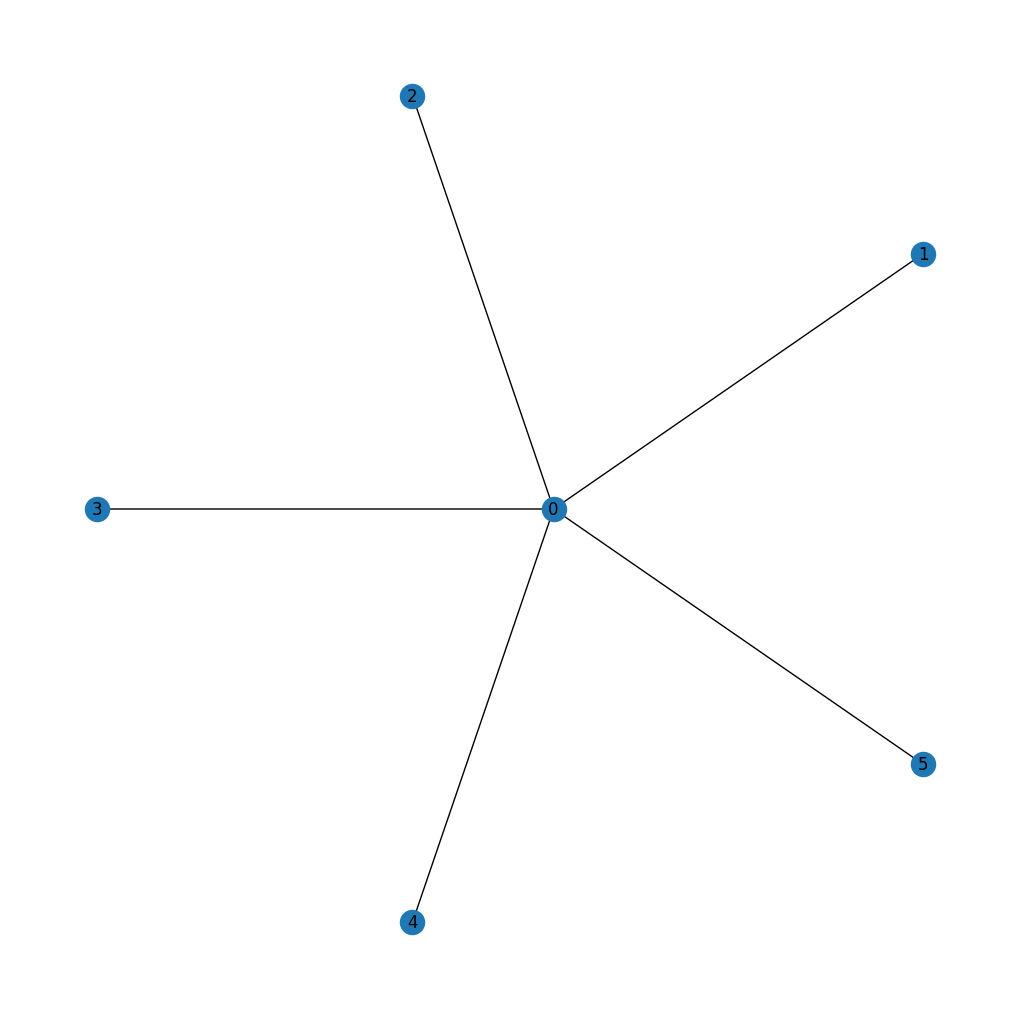

In [127]:
num_nodes = 5 # Less to calculate...
star_graph = StarGraph(n=num_nodes)
star_graph.draw() # By 'printed' in the assignment-text, I assume to draw / plot

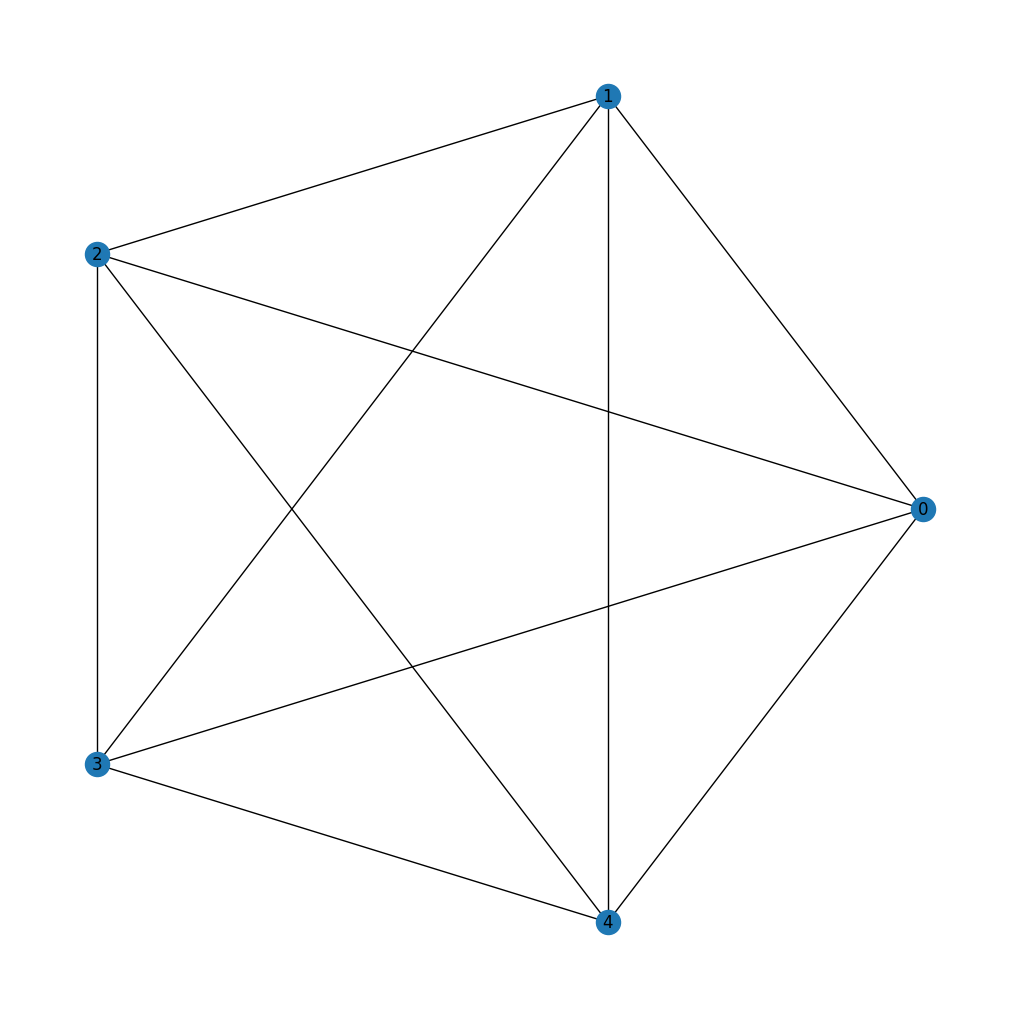

In [128]:
mesh_graph = MeshGraph(n=num_nodes)
mesh_graph.draw()


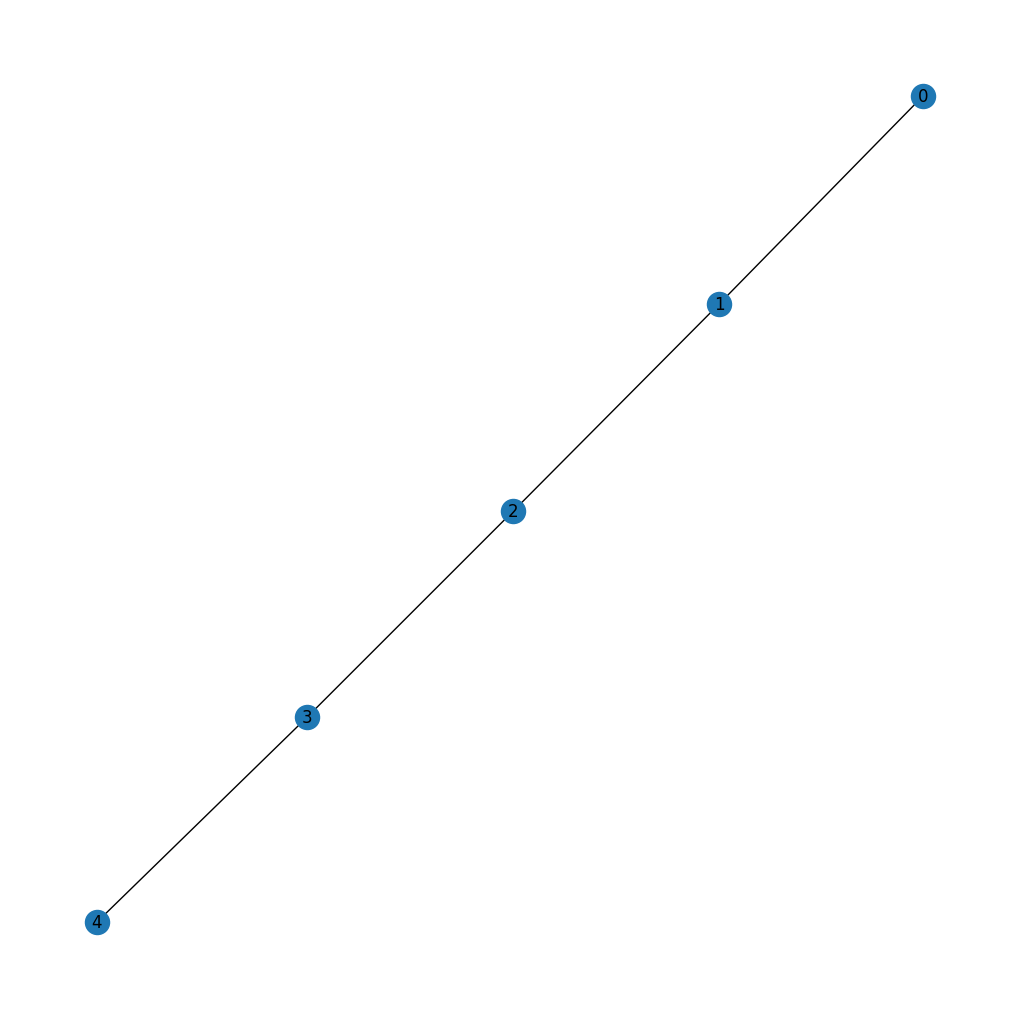

In [129]:
bus_graph = BussGraph(n=num_nodes) # Who tf cannot correct the class-name to 'BusGraph'?
bus_graph.draw()

### Task 1.1.2
Construct a **connected** graph by constructing at first an object of the class <code> Graph </code>. Then, add 5-10 nodes with the method <code>add_node()</code> or <code>add_nodes_from()</code>. Then add edges between nodes chosen by you using the method <code>add_edge()</code> or <code>add_edges_from()</code>. Finally, use the method <code>draw()</code> to draw the graph. The graph is supposed to have between 5 and 10 nodes.

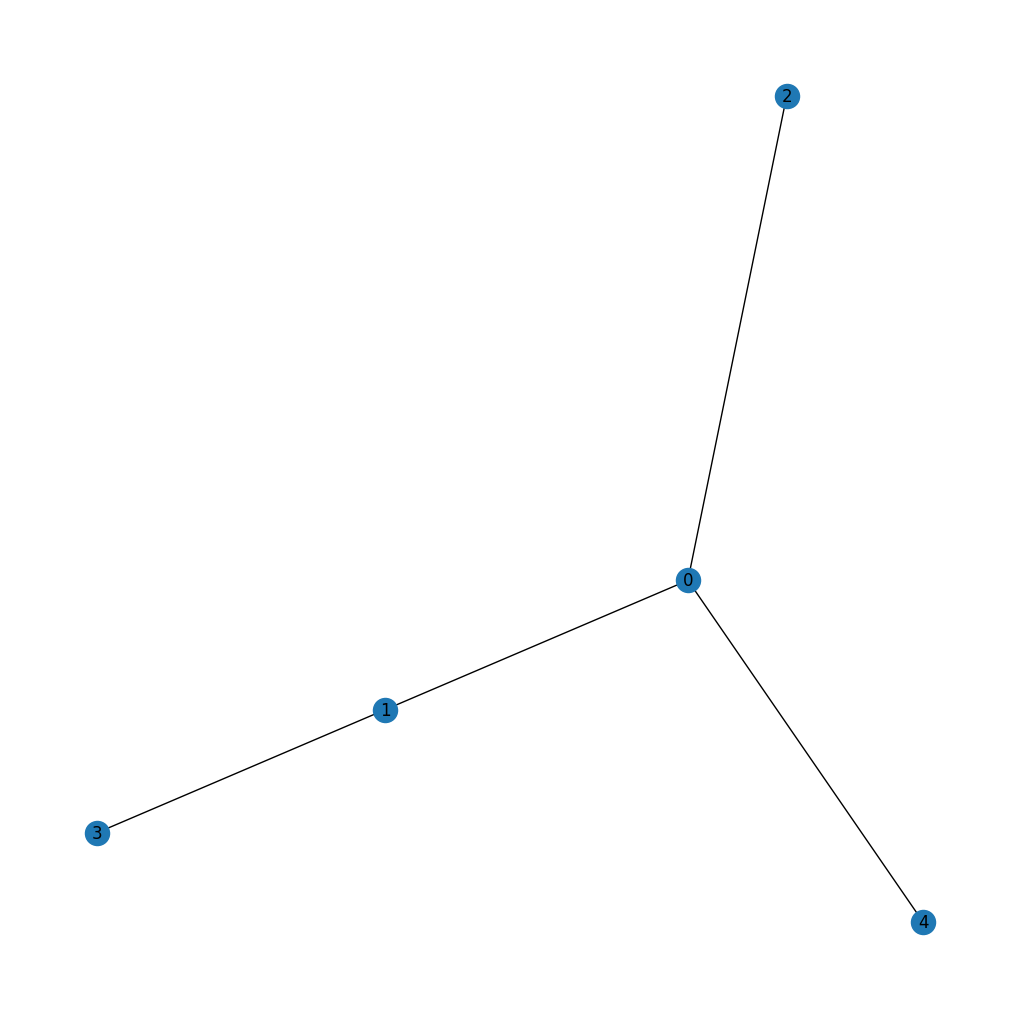

In [130]:
random.seed(student_seed)
graph = Graph()
graph.add_nodes_from([node_idx for node_idx in range(num_nodes)])

# Making something slightly random at least
# Could be more optimized
disconnected_nodes = [*range(num_nodes)]
connected_nodes = []
edges = []

while len(disconnected_nodes) > 0:
  node_i = random.choice(disconnected_nodes)
  disconnected_nodes.remove(node_i)
  if not edges:
    node_j = random.choice(disconnected_nodes)
    disconnected_nodes.remove(node_j)
    connected_nodes.append(node_j)
  else:
    node_j = random.choice(connected_nodes)
  connected_nodes.append(node_i)

  edges.append((node_i, node_j))


graph.add_edges_from(edges) 
graph.draw()



## Task 1.2
For each of the graphs from task 1.1.1 and 1.1.2, get the node with the highest **degree centrality** by hand. Show your calculations and explain the importance of a node with high degree centrality for the network.

<em> We expect to see that the students have understood what the notion degree centrality means, and that they got the most node with the highest degree centrality. We also expect to see the calculations, to acertain that the students have not found the node by using one of the following methods. Finally, we expect a commentary, explaining the importance of the node.</em>

In [131]:
# The degree centrability marks the number of edges a vertex is connected to. This means that the 
# highest degree centrability for a graph would be the node in said graph with the most connected
# edges. Having a higher degree centrability means that there are more direct connections through
# said node.



# Stargraph with 5 leaf-nodes

# Node-idx:   Num edges:
# 0           5           
# 1           1           
# 2           1                
# 3           1           
# 4           1           
# 5           1           

# For the star-graph, this is the node in the center (node-idx = 0), which has a degree-centrality 5

# Numbers 'calculated' directly from the graph

# The central node in the stargraph is extremely important, as it is connecting all of the other nodes.
# If this disconnects / gets a fatal error, it is impossible for the other nodes to communicate  


In [132]:
# Mesh, fully connected by 5 nodes 

# Node-idx:   Degree centrality:
# 0           4
# 1           4
# 2           4
# 3           4
# 4           4

# For a fully connected mesh with n nodes, each node will have a centrality index of n - 1
# This means that all nodes are equally important 

# If a node fails, the rest of the network will continue working, since there are enough other
# connections in the mesh. This makes it robust against failures, however really expensive to
# develop and maintain, as one requires connections (assuming a fully connected mesh) to all 
# other nodes 


In [133]:
# Bus consisting of 5 nodes 

# Node-idx:   Degree centrality:
# 0           1
# 1           2
# 2           2
# 3           2
# 4           1

# The edges of a bus-graph have a centrality index of 1, while all other nodes have a centrality
# index of 2 
# The 'internal' nodes are therefore the most important with respect to the centrality index

# If a failure occur in one of the 'internal' nodes (aka nodes with node-index 1,2,3), the 
# entire graph is split into two parts. Some of the nodes will become separated, and not
# allow for any communications 

In [134]:
# Custom, random graph from task 1.1.2 

# Node-idx:   Degree centrality:
# 0           3
# 1           2
# 2           1
# 3           1
# 4           1

# Node with index 0 has a degree of 3, which implies it is the most important node in the 
# network

# This graph has similarities with both the bus-graph and the star-graph. If node 0 disconnects,
# the graph will be left with a connection between nodes 1 and 3, while nodes 2 and 4 are left
# isolated. This means that 1 and 3 will be able to communicate between each other, but not to
# the nodes 2 or 4


## Task 1.3
For each graph, get the node with the highest **betweenness centrality** by hand. Show your calculations and explain the importance of a node with a high betweenness centrality for the network.  

<em> We expect to see that the students have understood what the notion of betweenness centrality means, and that they got the the node having the highest one. We also expect to see the calculations to acertain that the answer has not been found by one of the methods below. Finally, we expect a short commentary about why this node is important.</em>

In [135]:

# The betweenness centrality describes the number of shortest paths travelling through said node 
# relative to the number of existing shortest paths. Having a high betweenness centrality, means that 
# there are multiple shortest paths relying on the node. If anything happens with said node, many 
# connections / paths will be impacted. 


# Stargraph with 5 leaf-nodes

# Node-idx:   Number of shortest paths through node-idx:    Number of shortest paths from node s to node t, not including node-idx:   Betweenness-centrality:
# 0           4 + 3 + 2 + 1 = 10                            4 + 3 + 2 + 1 = 10                                                        10 / 10 = 1
# 1           0                                             10                                                                         0 / 10 = 0
# 2           0                                             10                                                                         0 / 10 = 0
# 3           0                                             10                                                                         0 / 10 = 0
# 4           0                                             10                                                                         0 / 10 = 0
# 5           0                                             10                                                                         0 / 10 = 0

# Node with idx = 0 is the one with the highest betweenness centrality, as all shortest paths
# from any node, must traverse through this center node


In [136]:
# Fully connected mesh with 5 nodes

# Node-idx:   Number of shortest paths through node-idx:    Number of shortest paths from node s to node t, not including node-idx:   Betweenness-centrality:
# 0           0                                             3                                                                         0 / 3 = 0
# 1           0                                             3                                                                         0 / 3 = 0
# 2           0                                             3                                                                         0 / 3 = 0
# 3           0                                             3                                                                         0 / 3 = 0
# 4           0                                             3                                                                         0 / 3 = 0

# None of the shortest paths will go through said nodes. This means that all nodes have the same 
# betweenness centrality, making them equally important.

In [137]:
# Bus-graph with 5 nodes

# Some examples of the shortest paths occuring:
# Start:        End:
# 0             1
# 0             2
# 0             3
# ...
# 2             4
# 3             4

# The nodes on the edges will have no other shortest paths moving through them, and therefore
# have a betweenness-centrality of 0

# Node-idx:   Number of shortest paths through node-idx:    Number of shortest paths from node s to node t, not including node-idx:   Betweenness-centrality:
# 0           0                                             3 + 2 + 1 = 6                                                             0 / 6 = 0
# 1           3                                             6                                                                         3 / 6 = 0.5
# 2           4                                             6                                                                         4 / 6 = 2 / 3   \approx 0.6667
# 3           3                                             6                                                                         3 / 6 = 0.5
# 4           0                                             6                                                                         0 / 6 = 0

# Node with index 2 in the bus, known as the center node, has the highest number of shortest paths running
# through itself. The center node (idx = 2) have has more shortest paths than the other nodes, due to the
# symmetry. There are more mathematical combinations of shortest paths through node with idx = 2 compared
# to the other nodes 


In [138]:
# Custom graph with 5 nodes

# The nodes on the edges will have no other shortest paths moving through them, and therefore
# have a betweenness-centrality of 0

# Node-idx:   Number of shortest paths through node-idx:    Number of shortest paths from node s to node t, not including node-idx:   Betweenness-centrality:
# 0           5                                             2 + 1 + 1 + 1 + 1 = 6                                                     5 / 6           \approx 0.8333
# 1           3                                             6                                                                         3 / 6 = 0.5
# 2           0                                             6                                                                         0 / 6 = 0 
# 3           0                                             6                                                                         0 / 6 = 0
# 4           0                                             6                                                                         0 / 6 = 0

# Not surprising, node with index 0 has the highest betweennes-centrality, as it is the center, and is the 
# node connecting the sets {2}, {4} to {1, 3} 


## Task 1.4
For each graph, get the node with the highest **closeness centrality** by hand. Show your calculations and explain the importance of a node with a high closeness centrality for the network.  

<em> We expect to see that the students have understood what the notion of closeness centrality means, and that they got the the node having the highest one. We also expect to see the calculations to acertain that the answer has not been found by one of the methods below. Finally, we expect a short commentary about why this node is important.</em>

In [139]:
# Closeness centrality is given by the formula
# \frac{n - 1}{\sum_{i \neq j} d_{ij}}
# where n number of nodes and d_{ij} is the shortest path between nodes i and j

# Having a higher value, means that the node is on average closer to the rest of 
# the nodes in the graph. 


# Star-graph

# Nodes with idx in {1, 2, 3, 4, 5}
# \sum_{i \neq j} d_{ij} = 1 + 4 * 2 = 9
# n - 1 = 6 - 1 = 5
# Closeness-centrality = 5 / 9 \approx 0.5556

# Nodes with idx in {0}
# \sum_{i \neq j} d_{ij} = 5 * 1 = 5
# n - 1 = 6 - 1 = 5
# Closeness-centrality = 5 / 5 = 1

# The closeness-centrality describes how close a node is to all other nodes in
# the graph. The central node, aka node with index 0, has the least distance to
# the other nodes in the network, as it has a direct connection to all other 
# nodes  



In [140]:
# Mesh

# Nodes with idx in {0, 1, 2, 3, 4}
# \sum_{i \neq j} d_{ij} = 4 * 1 = 4
# n - 1 = 5 - 1 = 4
# Closeness-centrality = 4 / 4 = 1

# Due to symmetry in the mesh, where all nodes have a direct connection to all other nodes, 
# all nodes have the same closeness-centrality of 1. This means all nodes are equally important. 

In [141]:
# Bus

# Node-idx:   n - 1:      \sum_{i \neq j} d_{ij}:   Closeness-centrality:
# 0           5 - 1 = 4   1 + 2 + 3 + 4 = 10        4 / 10 = 0.4
# 1           4           2 * 1 + 2 + 3 = 7         4 / 7             \approx 0.5714 
# 2           4           2 * 1 + 2 * 2 = 6         4 / 6 = 2 / 3     \approx 0.6667
# 3           4           2 * 1 + 2 + 3 = 7         4 / 7             \approx 0.5714
# 4           4           1 + 2 + 3 + 4 = 10        4 / 10 = 0.4

# Node with idx=2, aka the center node in the bus, has the highest closeness-centrality.
# This is due to being closest to both parts of the graph 


In [142]:
# Custom graph

# Node-idx:   n - 1:      \sum_{i \neq j} d_{ij}:   Closeness-centrality:
# 0           5 - 1 = 4   2 * 1 + 1 + 2 = 5         4 / 5 = 0.8
# 1           4           2 * 1 + 2 * 2 = 6         4 / 6 = 2 / 3     \approx 0.6667 
# 2           4           1 + 2 * 2 + 3 = 8         4 / 8 = 0.5
# 3           4           1 + 2 + 2 * 3 = 9         4 / 9             \approx 0.4444
# 4           4           1 + 2 * 2 + 3 = 8         4 / 8 = 0.5

# Node with index 0, has the highest closeness-centrality, as three of the other nodes in the 
# graph only has a distance of 1, while the last has a distance of 2. All other nodes have at 
# most 2 edges with a distance of 1  


## Task 1.5
The degree distribution can be represented by a histogram. What is the degree distribution, and why does it make sense to represent it with a histogram? 

For each graph, render the histogram of the degree distribution and comment on what you see.

* Use the method <code>histogram()</code> for this task.

<em> We expect to see that the students have understood what the degree distribution is and how it is used. Additionally, we expect to see one histogram per graph with a short comment on what this histogram says about the graph.</em>

In [143]:
# The degree distribution is a method of showing the degree-centrability in the graph.
# The x-axis is the node-degree, while the y-axis is the number of nodes achieving said
# node degree. By using a histogram, especially for larger graphs, it is possible to easier
# see how the graph is and detect any weaknesses in the network. Visualising the data makes
# it much easier to understand, instead of just looking at the raw numbers. 
# For example, assuming there are many nodes with a low degree, and only a handful of 
# nodes with high node degree. This implies that the nodes with a high-node degree are 
# extremely important to protect, as a down-time with these will affect many users. 


StarGraph


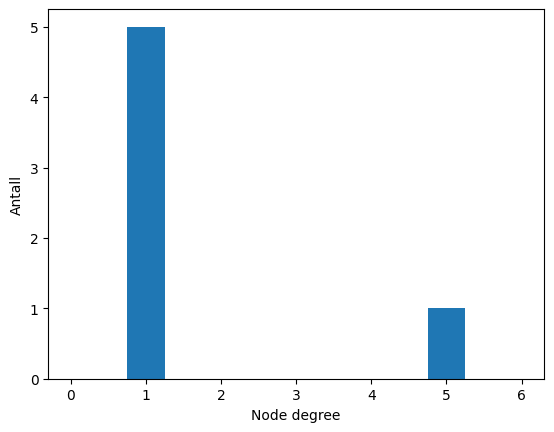

[0, 5, 0, 0, 0, 1]

In [144]:
print("StarGraph")
star_graph.histogram()

# Star-graph
# One node with a node-degree of 5, namely the center node with index 0 
# Five nodes with a noide-degree of 1, which are the nodes in {1, 2, 3, 4, 5}


MeshGraph


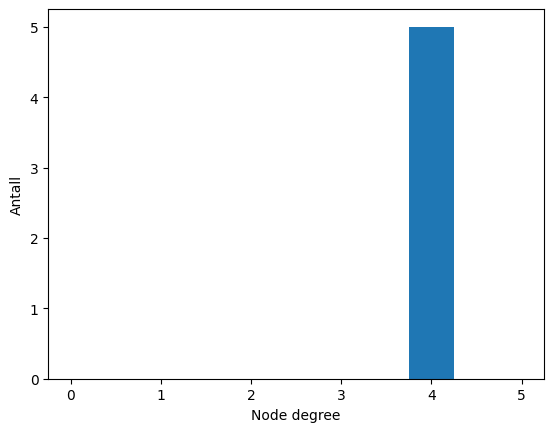

[0, 0, 0, 0, 5]

In [145]:
print("MeshGraph")
mesh_graph.histogram()

# Mesh-graph
# Five nodes with a node-degree of 4, since all nodes are fully connected to all 
# other nodes

BusGraph


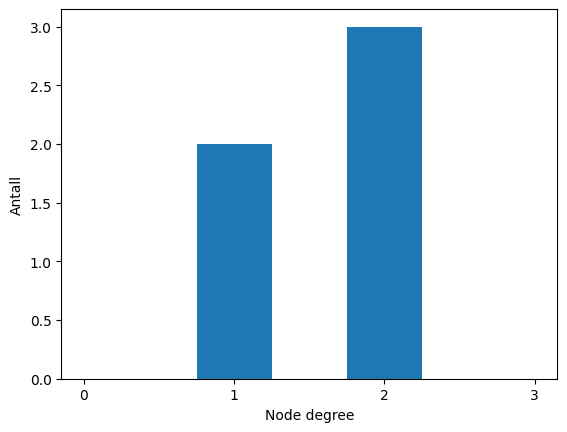

[0, 2, 3]

In [146]:
print("BusGraph")
bus_graph.histogram()

# Bus-graph
# Two nodes with a node-degree of 1, which are the nodes with idx in {0, 4} 
# Three nodes with a node-degree of 2, which are the nodes closer to the center, and
# have the idx in {1, 2, 3}


CustomGraph


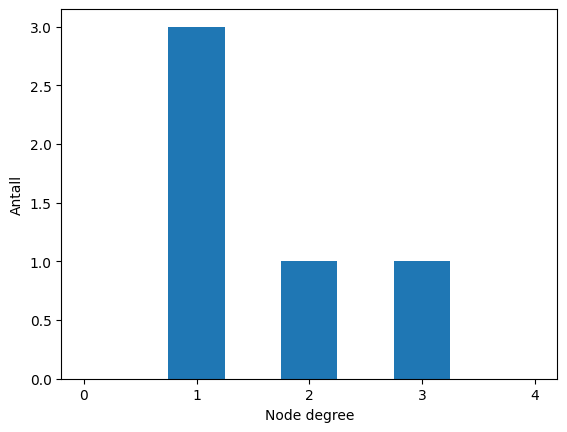

[0, 3, 1, 1]

In [147]:
print("CustomGraph")
graph.histogram()

# Custom-graph
# Three nodes with a node-degree of 1, which are the nodes with idx in {2, 3, 4} 
# One node with a node-degree of 2, which is the node with idx = 1 
# One node with a node-degree of 3, which is the node with idx = 0 

# Part 2: Structur analysis
In this part will we introduce more graph structure. These graph structures are more complex, but mirror real networks better.
<br/> <em>Hint: Use seed=student_seed to get the same graph each time.</em>

## Task 2.1

Construct the following 4 graphs, all with 100 nodes:

    Graph 1: A Barabasi Albert graph with parameter m=1
    Graph 2: A Barabasi Albert graph with parameter m=2
    Graph 3: A Watts Strogatz graph with parameter k=2 and p=0.1
    Graf 4: A Watts Strogatz graph with parameter k=4 and p=0.1

You are not required to plot the graphs, but just to construct an object for each graph. It can however be helpful for you to see what the graphs look like.

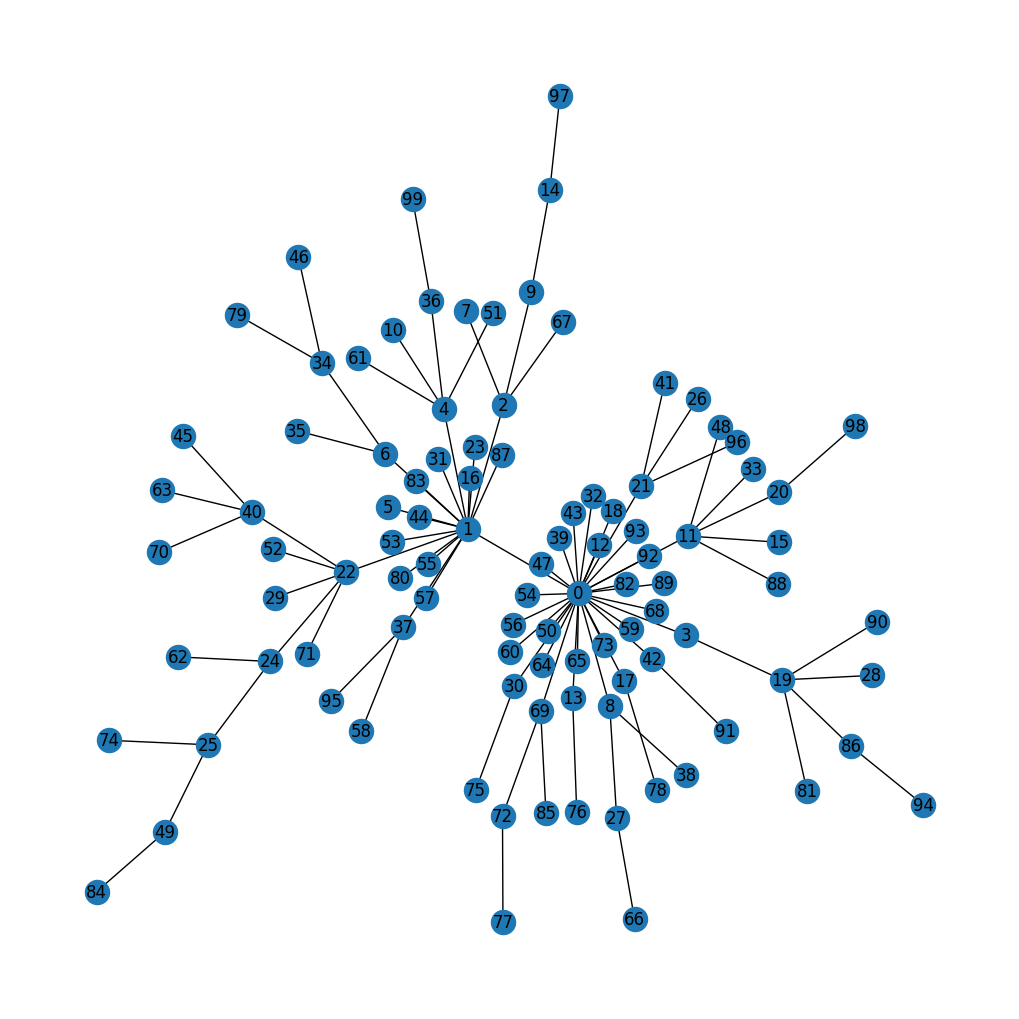

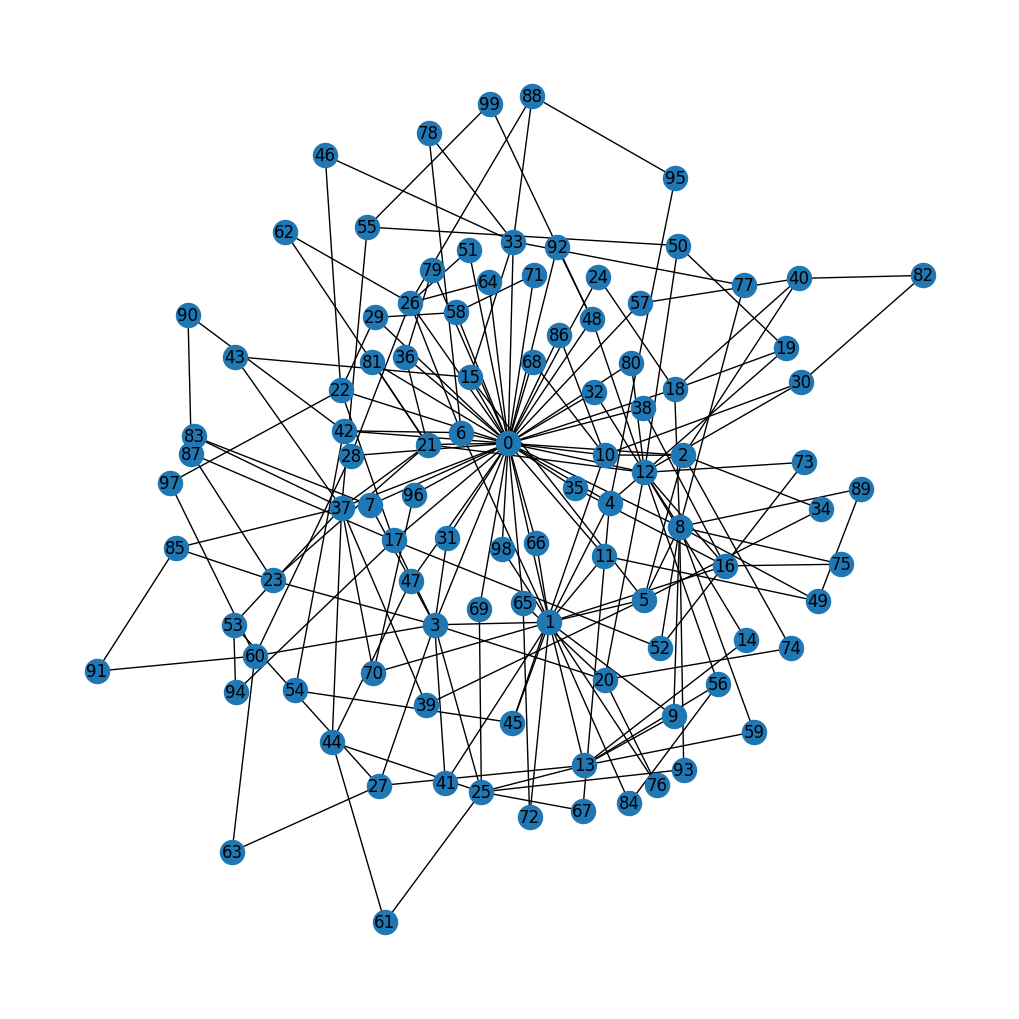

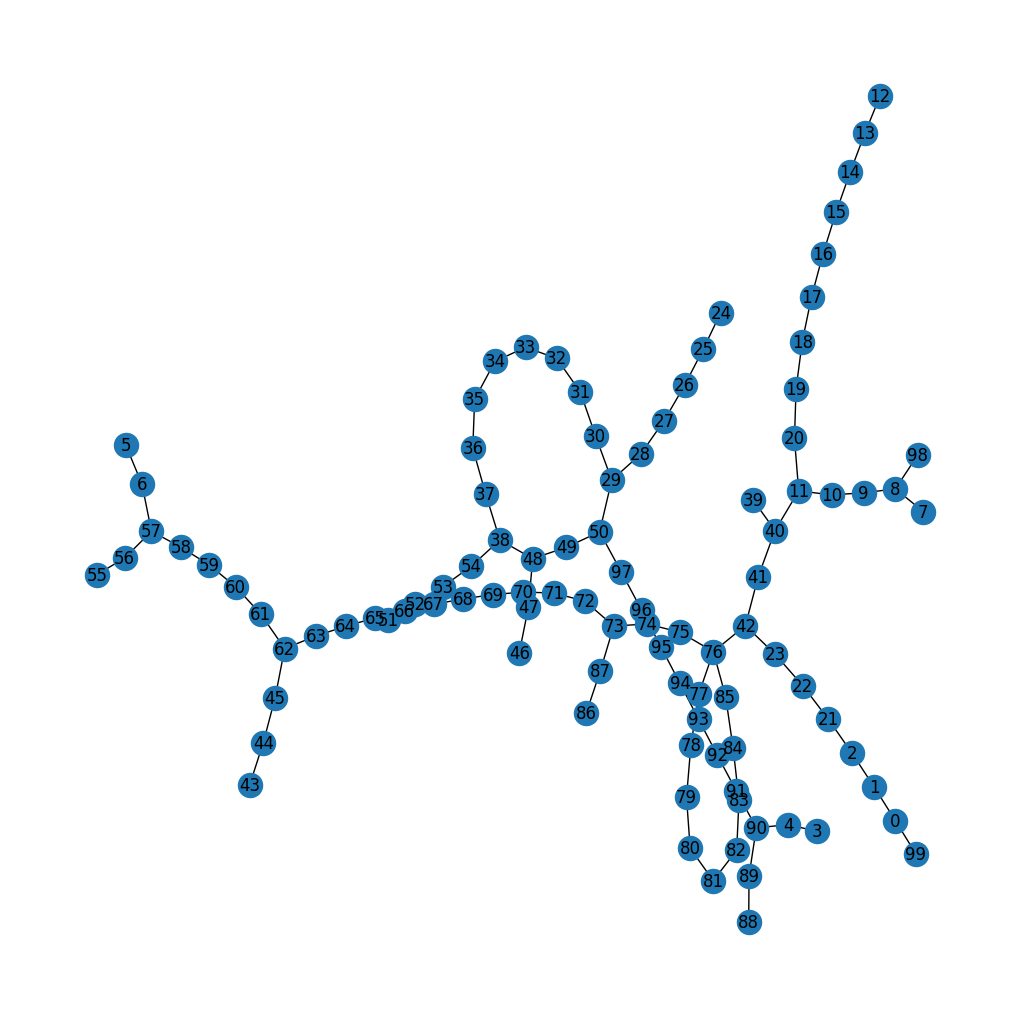

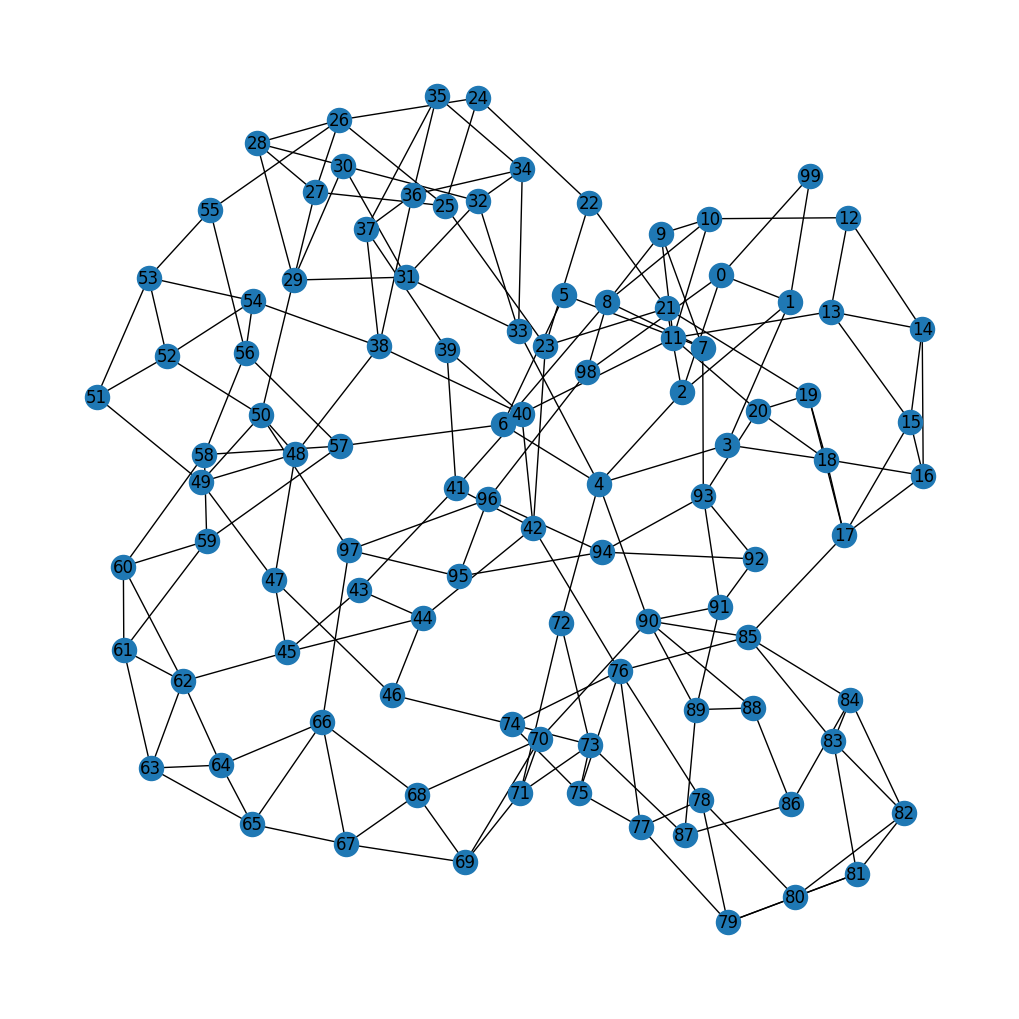

In [148]:
random.seed(student_seed)

n = 100 
m_g1 = 1
m_g2 = 2

k_g3, p_g3 = 2, 0.1
k_g4, p_g4 = 4, 0.1 

barabasi_albert_g1 = BarabasiAlbert(n=n, m=m_g1, seed=student_seed)
barabasi_albert_g2 = BarabasiAlbert(n=n, m=m_g2, seed=student_seed)

barabasi_albert_g1.draw()
barabasi_albert_g2.draw()

watts_strogatz_g3 = WattsStrogatz(n=n, k=k_g3, p=p_g3, seed=student_seed)
watts_strogatz_g4 = WattsStrogatz(n=n, k=k_g4, p=p_g4, seed=student_seed)

watts_strogatz_g3.draw()
watts_strogatz_g4.draw()


## Task 2.1.1
Comment the histograms with respect to possible strengths or vulnerabilities of the different graphs.

<em> We expect to see a connected body of text, in which similarities and differences between the different graphs are considered. The focus should be on strengths and vulnerabilites.</em>

Graph 1


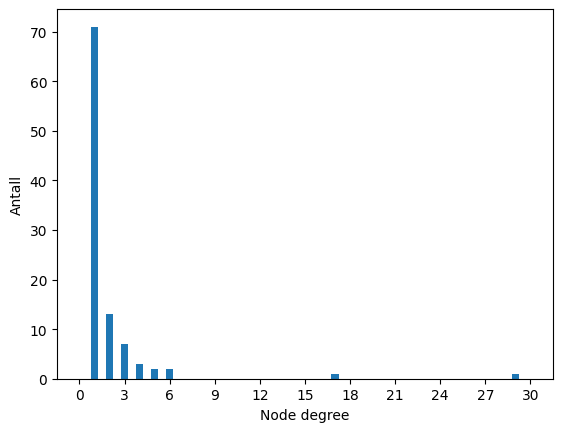

In [149]:
print("Graph 1")
_ = barabasi_albert_g1.histogram() 


Graph 2


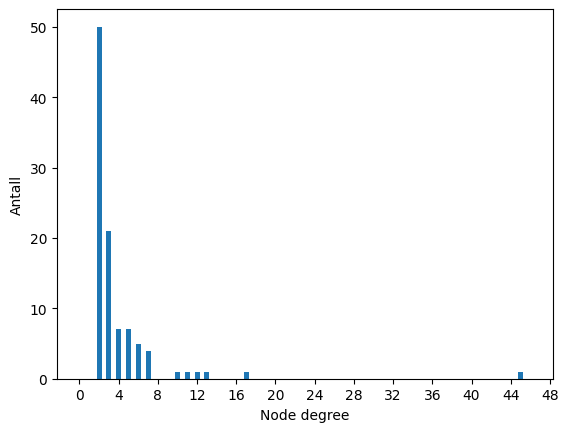

In [150]:
print("Graph 2")
_ = barabasi_albert_g2.histogram()

Graph 3


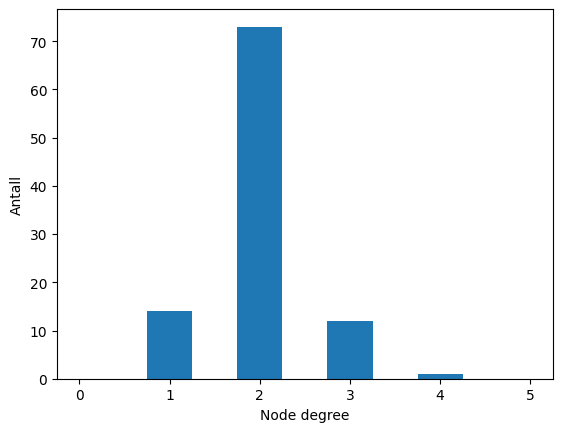

In [151]:
print("Graph 3")
_ = watts_strogatz_g3.histogram()

Graph 4


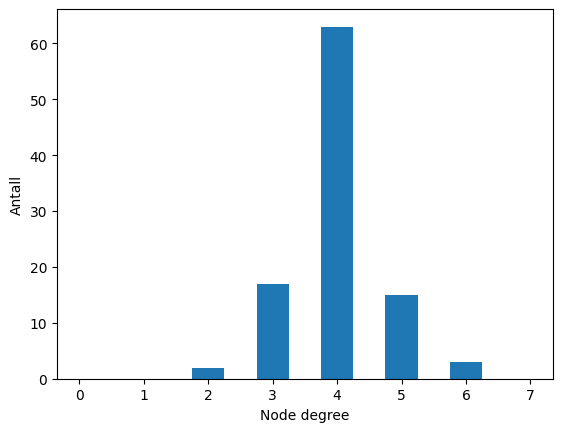

In [152]:
print("Graph 4")
_ = watts_strogatz_g4.histogram()

In [153]:
# The Barabazi-Albert algorithm uses a power-law to generate the graph.
# This means the generated graph is a scale-free network, with a few hubs and mostly smaller
# connections (https://en.wikipedia.org/wiki/Scale-free_network)
# This could be f.ex. the internet 

# Scale free graph / network
#   Advantages:
#     - quite robust with respect to random errors, as these are more likely 
#       to occur in less important nodes
#   Disadvantages:
#     - a deliberate attack on the hub(s), will greatly affect the performance
#       over the entire network 


# Graph 1:
#   Scale free graph / network, such that deliberate attacks on the hubs, or a random error
#   occuring at the hub(s), the entire network will crash. Since most of the nodes
#   have a low node degree, it is efficient to implement and maintain


# Graph 2: 
#   Compared to graph 1, there are more nodes with a higher node-degree. All nodes have at 
#   least a node degree of 2, making it slightly more complicated to implement, due to more 
#   edges to establish. It is however more robust to deliberate attacks and random errors on 
#   the main hub(s), due to an increased number of paths between the sub-graphs.   



# The Watts–Strogatz algorithm generates a random small-world graph.
# This means that most nodes have generally few edges / connections, but are likely to 'know
# someone that knows someone' (https://en.wikipedia.org/wiki/Small-world_network)
# This could be f.ex. a graph showing friendships 

# Small-world graph / network
#   Advantages:
#     - easy and cost-efficient to implement and maintain as there are few edges
#     - robust against delibirate attacks
#   Disadvantages:
#     - susceptible for random errors

# Graph 3:
#   Most of the nodes have a node-degree of 2. This degree centrality, implies the
#   connections are linked together. It is simple to implement, however a random error in
#   of one the nodes or edges, could cut of large parts of the network. It is luckily not
#   likely to be delibiratly attacked, as most of the nodes are of equal importance. 


# Graph 4: 
#   Compared to graph 3, most of the nodes have a degree centrality of 4. This means that 
#   the network is even more robust with respect to malicious attacks and random errors,
#   however would be far more difficult to implement.  


## Task 2.2
Construct a graph such that

1) the same node(s) has/have highest betweenness, closeness and degree centrality.

2) node(s) that have the highest betweenness centrality are not the same as nodes with highest degree centrality. (Hint: Look at the Petersen graph)

<em> We expect to see that the students have understood the difference between those two notions. Additionally, we expect to see two graphs drawn fulfilling the above requirements.</em>

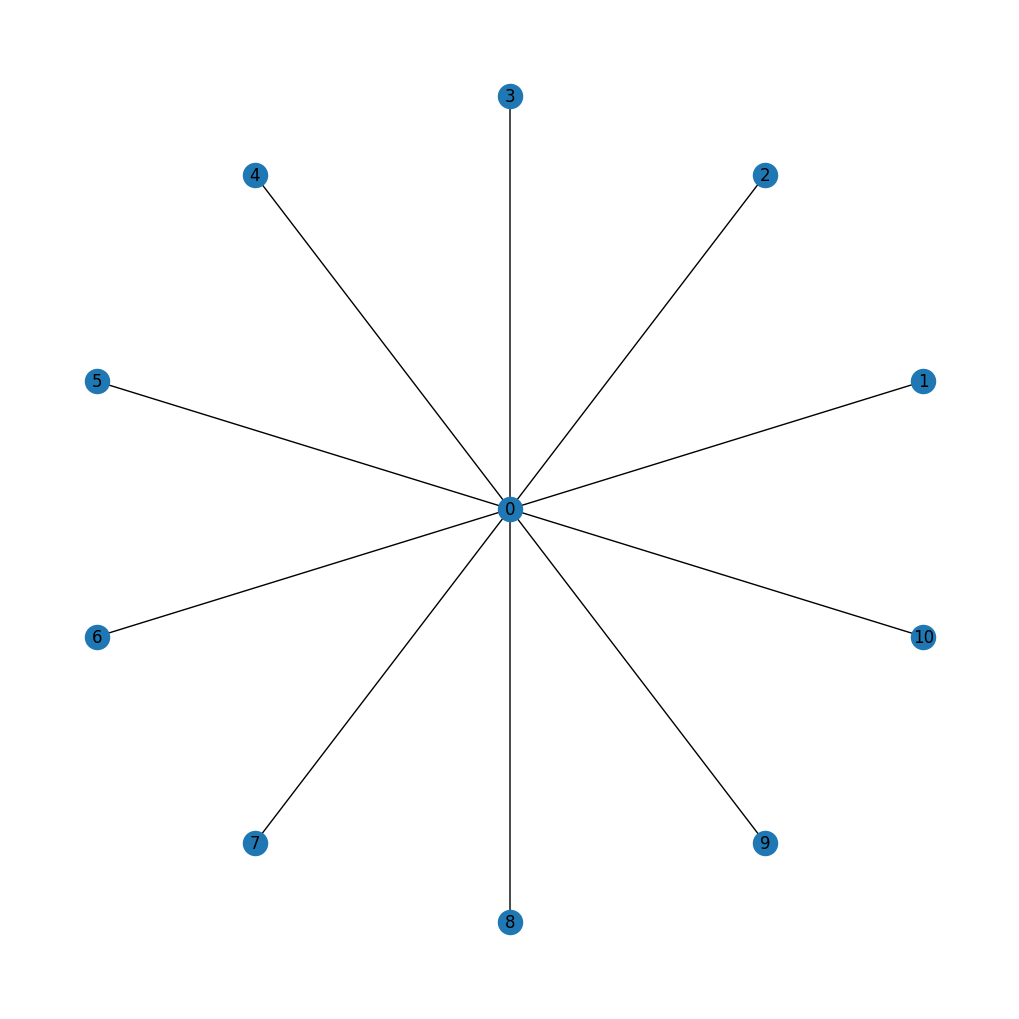

In [154]:
# Easiest example, is a node connected to multiple other nodes, such as a star graph
StarGraph(n=10).draw()

In [155]:
# This graph is almost identical with the previous star-graph, except having more nodes

####################### Closeness-centrality #######################
# Nodes with idx in {1, 2, ..., 9, 10}
# \sum_{i \neq j} d_{ij} = 1 + 9 * 2 = 19
# n - 1 = 11 - 1 = 10
# Closenes-centrality = 10 / 19 \approx 0.5263

# Nodes with idx in {0}
# \sum_{i \neq j} d_{ij} = 10 * 1 = 10
# n - 1 = 11 - 1 = 10
# Closeness-centrality = 5 / 5 = 1

# Node 0 has highest closeness-centrality


####################### Betweenness-centrality #######################

# Nodes with idx in {1, 2, ..., 9, 10} has no shortest paths running through themselves
# => betweenness-centrality for these nodes are 0

# Central node:
# Number of shortest paths running through the central node: 9 + 8 + 7 + ... + 3 + 2 + 1 = 45
# Number of shortest paths from node s to t, not including the central node: 9 + 8 + 7 + ... + 3 + 2 + 1 = 45 
# Betweenness-centrality = 45 / 45 = 1

# Node 0 has the highest betweenness-centrality


####################### Degree centrality #######################

# Nodes with idx in {1, 2, ..., 9, 10} are only connected to node 0, and have a degree centrality of 1

# Node 0 is connected to nodes in {1, 2, ..., 9, 10}, and therefore has a degree centrality of 10

# Node 0 has the highest degree centrality




# Summary: Node 0 has the highest degree centrality, betweenness-centrality and closeness-centrality


[(0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 6), (2, 4), (2, 0), (2, 7), (3, 0), (3, 1), (3, 8), (4, 1), (4, 2), (4, 9), (5, 6), (6, 7), (7, 8), (8, 9), (9, 5)]


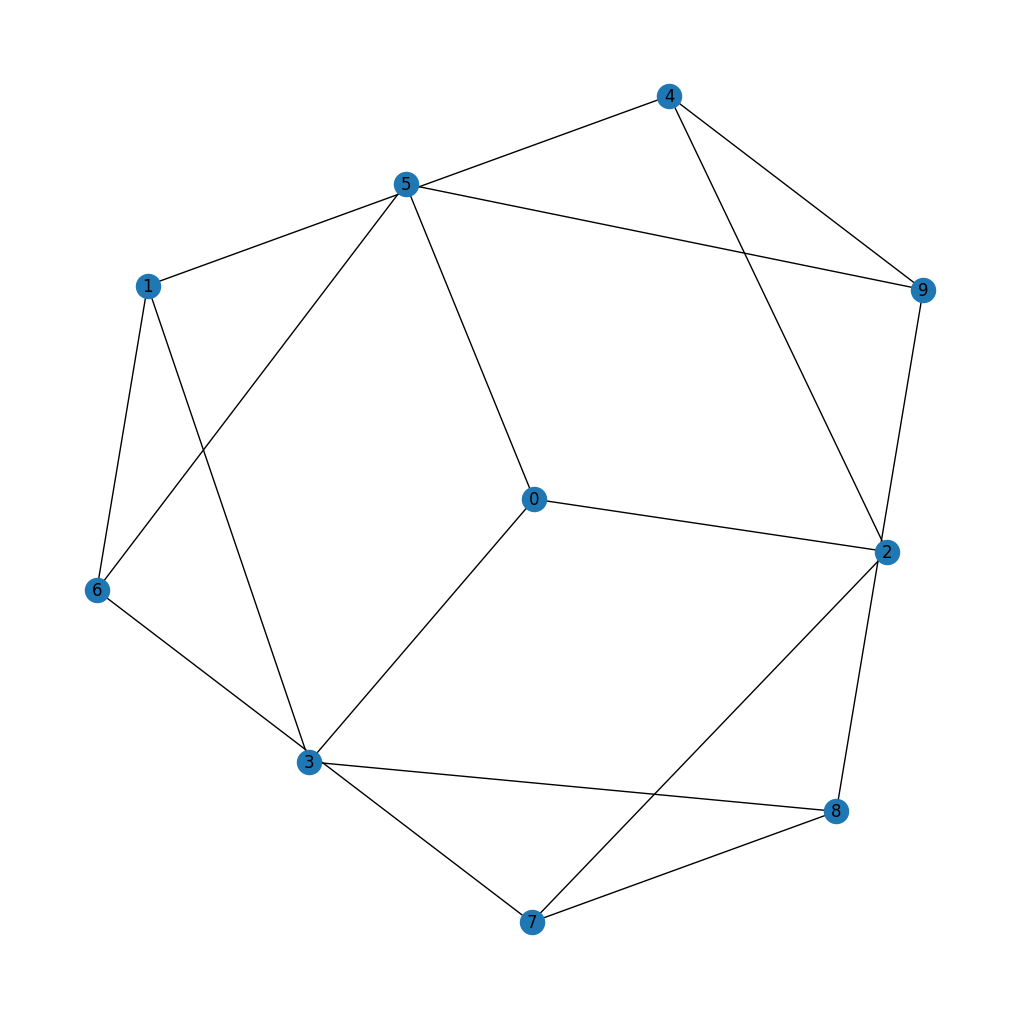

In [156]:
# node(s) that have the highest betweenness centrality are not the same as nodes with highest degree centrality. (Hint: Look at the Petersen graph)

# Petersen graph: (https://en.wikipedia.org/wiki/Petersen_graph)
# Based on the hint, it appears that the Petersen graph should satisfy the requirements, however I get that all nodes have the same
# degree centrality, and all nodes have the same betweenness-centrality. Unless I have done something blatantly incorrect, a custom
# graph must be designed  

num_nodes = 10
num_internal_nodes = 5

petersen_graph = Graph()
petersen_graph.add_nodes_from([*range(num_nodes)]) 

# The nodes to connect
# Bit hardcoded though...

# The internal nodes
edges = []
for idx in range(num_internal_nodes):
  # Let the hardcoding begin:
  node_plus_2 = (idx + 2) % num_internal_nodes
  node_plus_3 = (idx + 3) % num_internal_nodes
  node_plus_5 = idx + 5

  nodes = [node_plus_2, node_plus_3, node_plus_5]
  for node in nodes:
    edge = (idx, node)
    edges.append(edge)

# Connecting the exterior edges
for node_idx in range(num_internal_nodes, num_nodes):
  next_node = (node_idx + 1)
  if next_node >= num_nodes:
    next_node = num_internal_nodes
  edge = (node_idx, next_node)
  edges.append(edge)

print(edges) 
petersen_graph.add_edges_from(edges)

petersen_graph.draw()


In [157]:
####################### Degree centrality #######################

# All nodes in the graph have a degree centrality of 3, even though it does not directly 
# appear that way based on the graph. In the graph, there is NO edge between 3 and 6 or 3 and 7 f.ex.
# even though it looks like it.


####################### Betweenness-centrality #######################

# This graph is highly symmetrical, and it is therefore easy to calculate the betweenness-centrality

# For clarification
# Nodes with idx = {0, 1, 2, 3, 4} are here called internal nodes
# Nodes with idx = {5, 6, 7, 8, 9} are here called external nodes
# The naming is with respect to the original Petersen graph found at wikipedia, linked above


# Internal nodes {0, 1, 2, 3, 4}:
# If my reasoning is correct, there are 2 shortest paths passing over one of the internal nodes
# which does not include said node as an endpoint


# External nodes {5, 6, 7, 8, 9}:
# If my reasoning is correct, there are 2 shortest paths passing over one of the external nodes
# which does not include said node as an endpoint


# I haven't calculated the number of shortest paths, but since all nodes have the same number of
# shortest paths over themselves, they should all have the same betweenness-centrality. This means
# that the Petersen graph does not satisfy the requirements 


# Just to clarify whether I have done something wrong:
print(petersen_graph.betweenness_centrality())
print(petersen_graph.degree_centrality())


{0: 0.08333333333333333, 1: 0.08333333333333333, 2: 0.08333333333333333, 3: 0.08333333333333333, 4: 0.08333333333333333, 5: 0.08333333333333333, 6: 0.08333333333333333, 7: 0.08333333333333333, 8: 0.08333333333333333, 9: 0.08333333333333333}
{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.3333333333333333, 4: 0.3333333333333333, 5: 0.3333333333333333, 6: 0.3333333333333333, 7: 0.3333333333333333, 8: 0.3333333333333333, 9: 0.3333333333333333}


## Task 2.3

### Task 2.3.1

How does the degree distribution for a Barabasi Albert graph change if m changed from 1 to 2? Explain why.

In [158]:
# As observed previously, all nodes have at least a node degree of 2, and there are more
# nodes with a higher degree. As written in the function documentation for the barabazi-albert:
# "m: Number of edges to attach from a new node to existing nodes" 

# Based on the documentation, every node is connected to at least m = 2 other nodes
# By having all nodes connected to at least m = 2 nodes, there will be more nodes which
# gets a higher degree centrality, compared to m = 1.


### Task 2.3.2
How does the degree disitribution change for a Watts Strogats graph when p gets bigger? Run some tests and explain why.

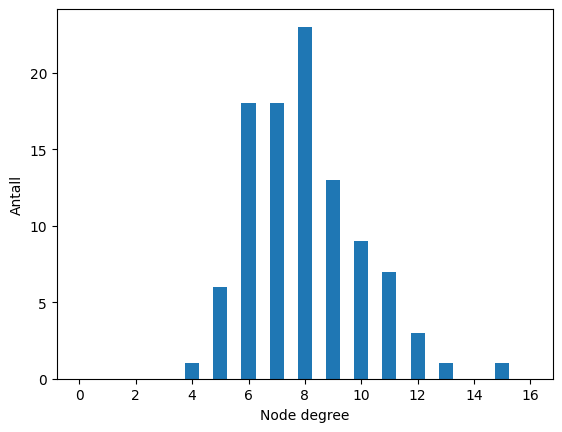

[0, 0, 0, 0, 1, 6, 18, 18, 23, 13, 9, 7, 3, 1, 0, 1]

In [159]:
random.seed(student_seed)

n = 100 
k = 8
p = 0.9

WattsStrogatz(n=n, k=k, p=p, seed=student_seed).histogram()



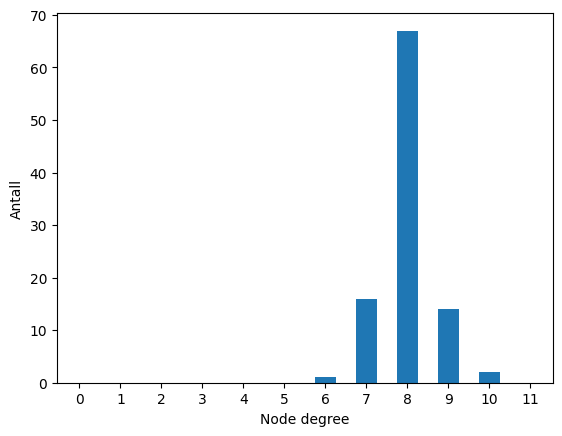

[0, 0, 0, 0, 0, 0, 1, 16, 67, 14, 2]

In [160]:
random.seed(student_seed)

p = 0.05

WattsStrogatz(n=n, k=k, p=p, seed=student_seed).histogram()

In [161]:
# With a smaller value, most nodes are likely to maintain the original
# shape, and not acquire new edges when new nodes appear. With a higher
# value for p, there is an increased probability that previous edges are
# rewired, such that some nodes gets a higher degree, while other loses
# edges


# Part 3: Attacks and Robustnes
In this part we will analyse a fictional network, that simulates a real network. 

## Task 3.1
<code>ConstructedGraph()</code> simulates a real network, consisting of a core net witha grid-structure, a regional net and a dense access net. Use the class and draw the graph.

For each of the three centralities, find the most central nodes and draw them. Where are the most important nodes located and how would you describe the robustness of the regional net? 

<em> Here we expect to see that the students have understood from which parts the network is build up. Additionally, we expect the students to show the most central nodes in each category, describe their location in the graph and discuss the robustness of the regional net. </em>

Marked the 8 most important nodes with respect to the degree centralities


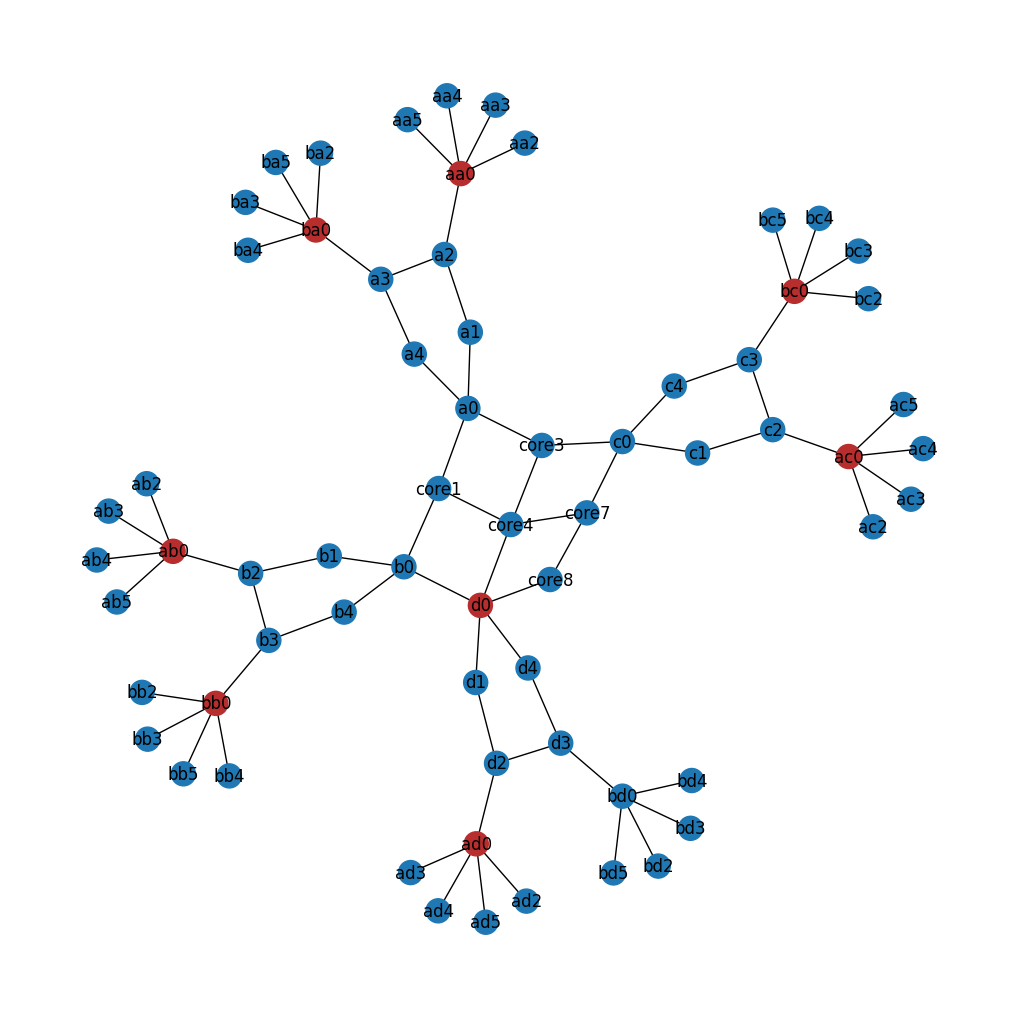

Marked the 8 most important nodes with respect to the closeness centralities


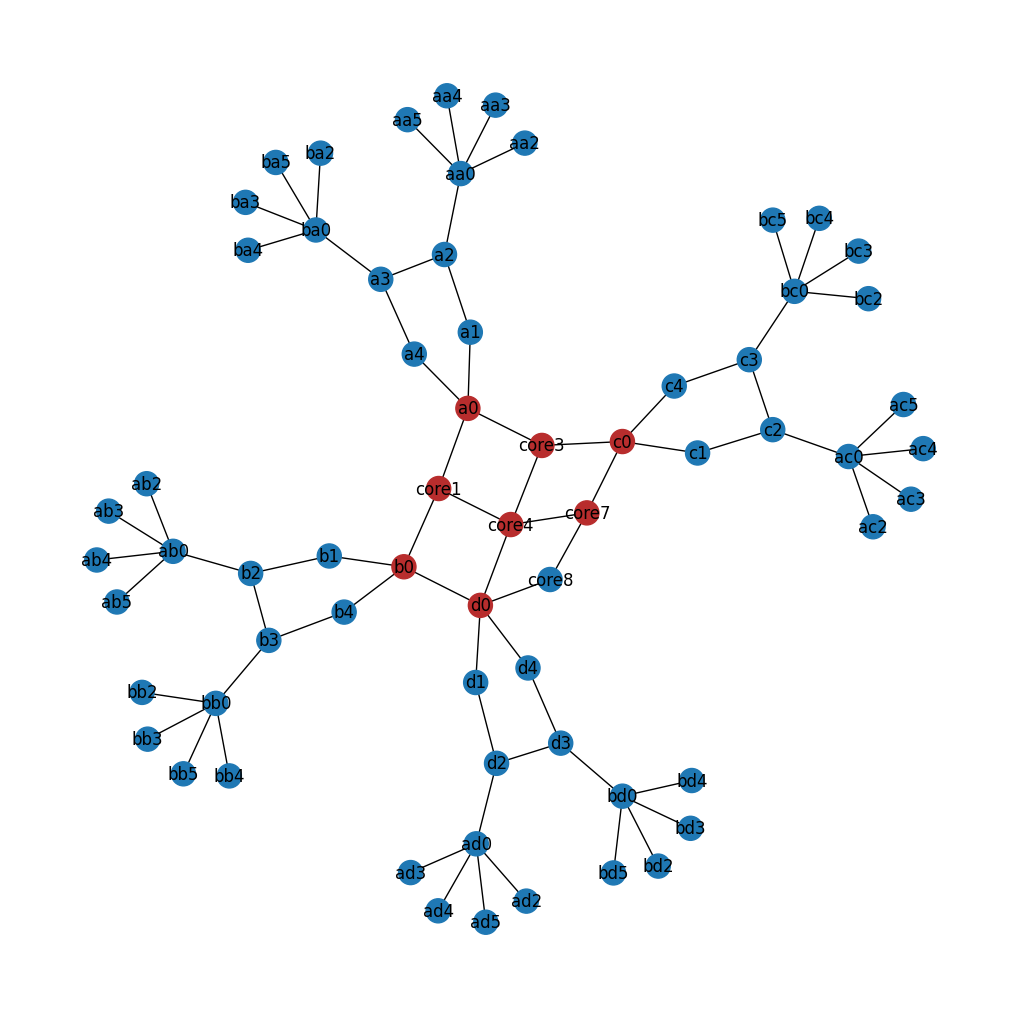

Marked the 8 most important nodes with respect to the betweenness centralities


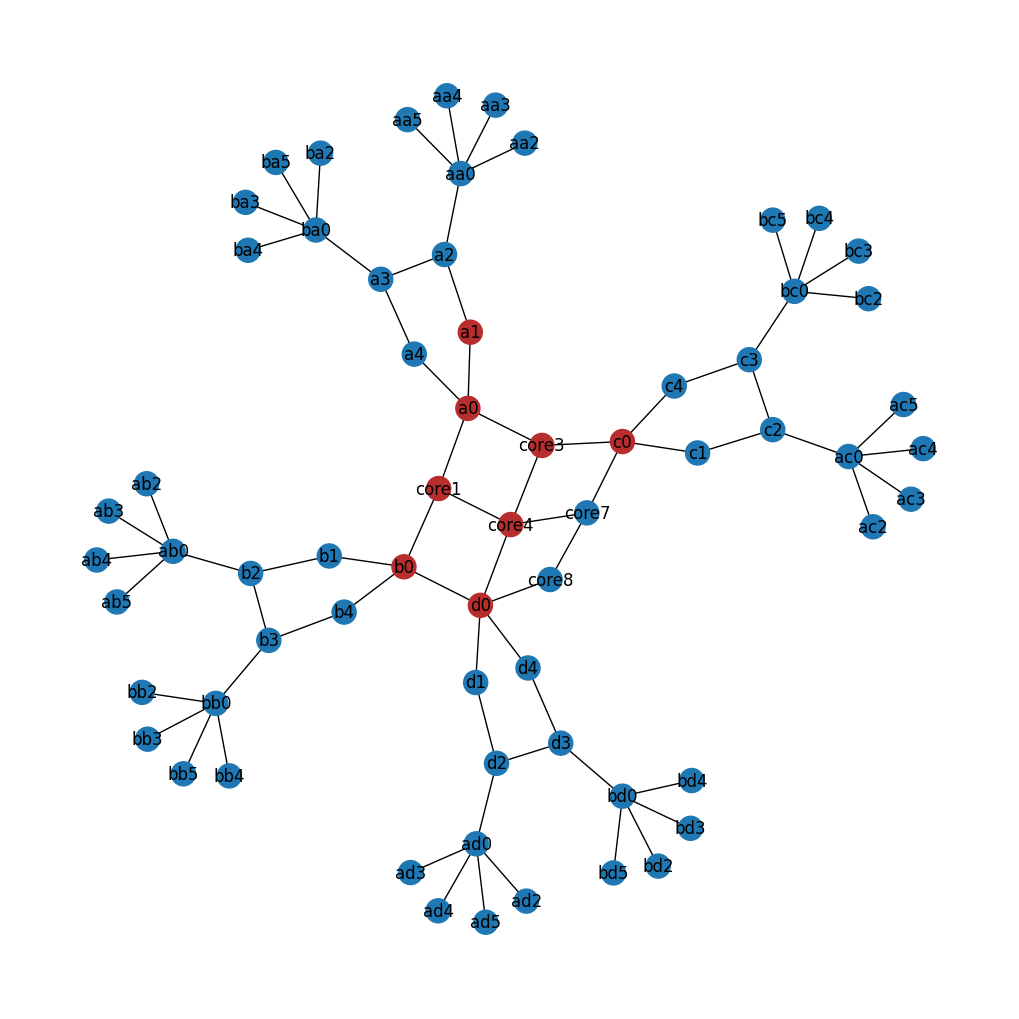

In [162]:
constructed_graph = ConstructedGraph(seed=student_seed)

num_sorted = 8 
descending_order = True

def sort_dictionary_values(dictionary : dict, num_sorted : int, descending_order : bool) -> dict:
  sorted_dictionaries = sorted(dictionary.items(), key=lambda x: x[1], reverse=descending_order) # reverse = True means descending order
  return sorted_dictionaries[:num_sorted] # First num_sorted values

def get_node_ids(dict_list : list) -> list:
  return list(map(lambda x: x[0], dict_list))

degree_centralities = constructed_graph.degree_centrality()
closeness_centralities = constructed_graph.closeness_centrality()
betweenness_centralities = constructed_graph.betweenness_centrality()

n_sorted_degree_centralities = sort_dictionary_values(degree_centralities, num_sorted, descending_order)
n_sorted_closeness_centralities = sort_dictionary_values(closeness_centralities, num_sorted, descending_order)
n_sorted_betweenness_centralities = sort_dictionary_values(betweenness_centralities, num_sorted, descending_order)

print("Marked the {} most important nodes with respect to the degree centralities".format(num_sorted))
constructed_graph.mark_nodes(get_node_ids(n_sorted_degree_centralities))
plt.show()

print("Marked the {} most important nodes with respect to the closeness centralities".format(num_sorted))
constructed_graph.mark_nodes(get_node_ids(n_sorted_closeness_centralities))
plt.show()

print("Marked the {} most important nodes with respect to the betweenness centralities".format(num_sorted))
constructed_graph.mark_nodes(get_node_ids(n_sorted_betweenness_centralities))
plt.show()

In [163]:
# The degree centralities are in the access-network, since these are the connection points for the end-users.
# These handles many connections, and if these access points disconnects, many end-users in a local area
# will lose connection with the rest of the graph. 
# The nodes with the names 'd0' and 'bd0' have the same centrality degree, and 'bd0' would be marked if I had
# incremented the number of values to be sorted.  
# In general, highest degree centrality at the access network

# The eigth nodes with the highest closeness centrality is the core network (except core 8) and the access
# points to the regional networks (10, b0, c0, d0). It is interesting to see that all of the regional networks
# have a higher closeness centrability than core 8, but this is likely caused by the design of the access 
# points between the core network and the regional networks. Core 8 is the only node in the core network 
# which does not have access to (2 regional networks or at least 2 core nodes). If core 8 and d0 had 
# switched places, this would have changed. Core 8 would in that case, achieved a closer connection to the
# regional network 'a...' through the direct connection with core 4.
# In general, higher closeness centrality at the core network     
 
# The eight nodes with the highest betweenness-centrality are the regional access points, core 1, 3 and 4
# and the node a1. It is interesting to see that a1 has a higher betweenness-centrality than core 7 and 8,
# but this is likely due to the asymmetry in the core-network discussed during the closeness centrality. 
# There are not enough shortest paths running over core 7 and 8 appearantly. 
# In general, higher betweenness-centrality at the core network and the regional network's access nodes
# to the core network 

# The regional networks have a fragile connection to the core network. All communication is directed over
# a single node. For example, the regional network 'b', relies on the node b0 to communicate with the 
# core network or the regional network 'a' f.ex. This implies that a direct attack at f.ex. 'b0', will
# affect many users. 
# The regional network is otherwise designed as a ring, such that if one node fails in the regional network,
# it is still possible to transmit data in the regional network.  

## Task 3.2
We shall analyze the network from task 3.1 more deeply, but we will use an extended version. Run the cell below to construct the network.

Use the method <code>delete_random_nodes</code> to simulate random network failures. 
* Remove one node and draw the graph.
* Remove three nodes and draw the graph.

Comment on the damage done to the network.

<em> We expect to see that students are able to draw two graphs, one with one and one with three nodes missing. These nodes should be deleted using the method <code>delete_random_nodes</code>. We additionally expect a short analysis of the nettwork and the damage resulting from the failures. Here, methods introduced above can be used.</em>

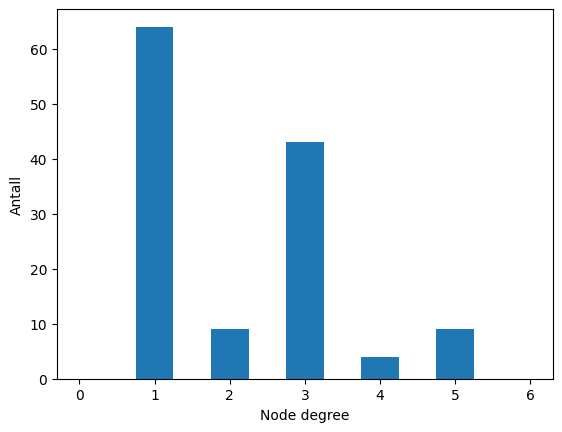

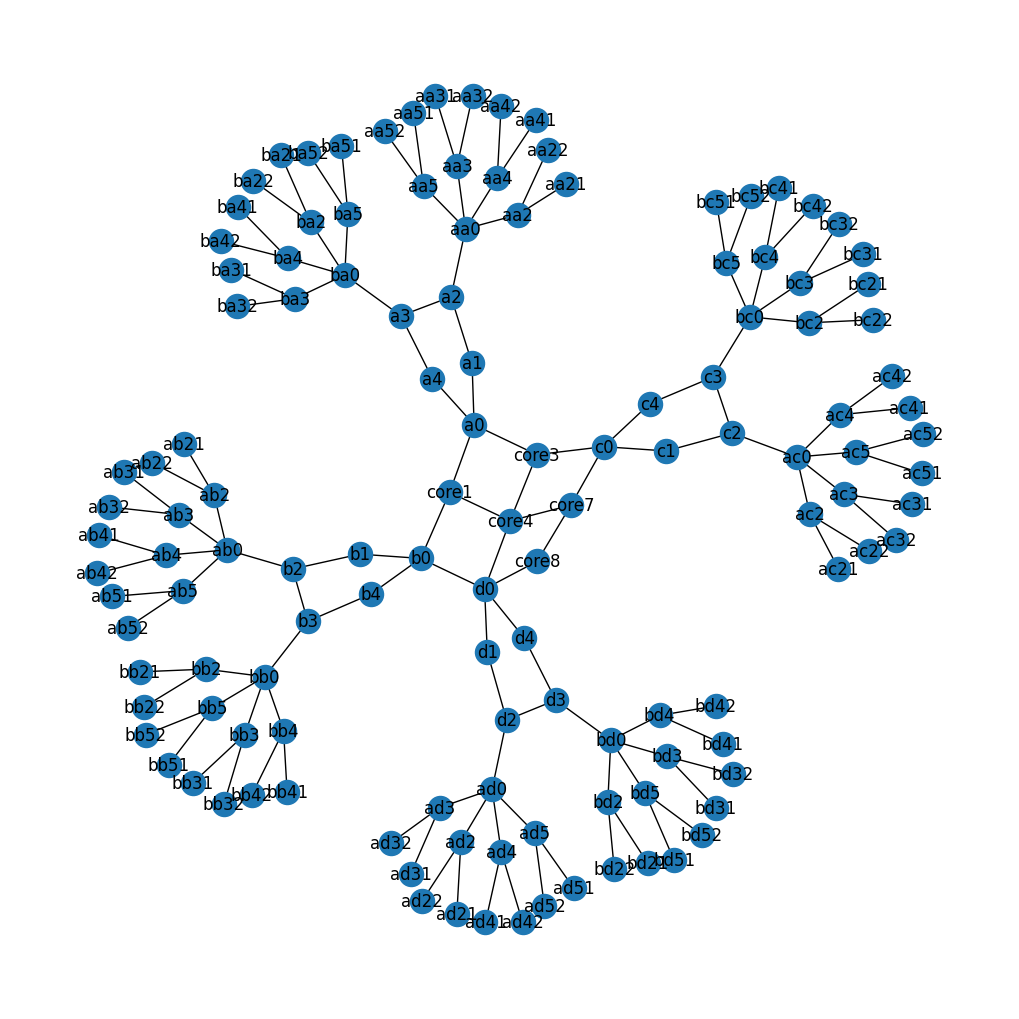

In [164]:
cge = ConstructedGraph(seed=student_seed, expanded=True)
cge.histogram()
cge.draw()

Removed node ab52 using random_fault


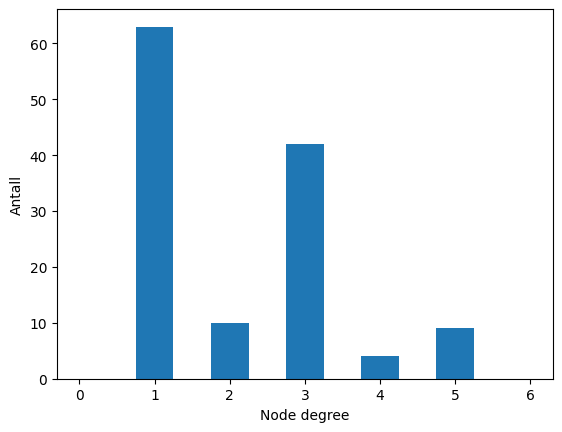

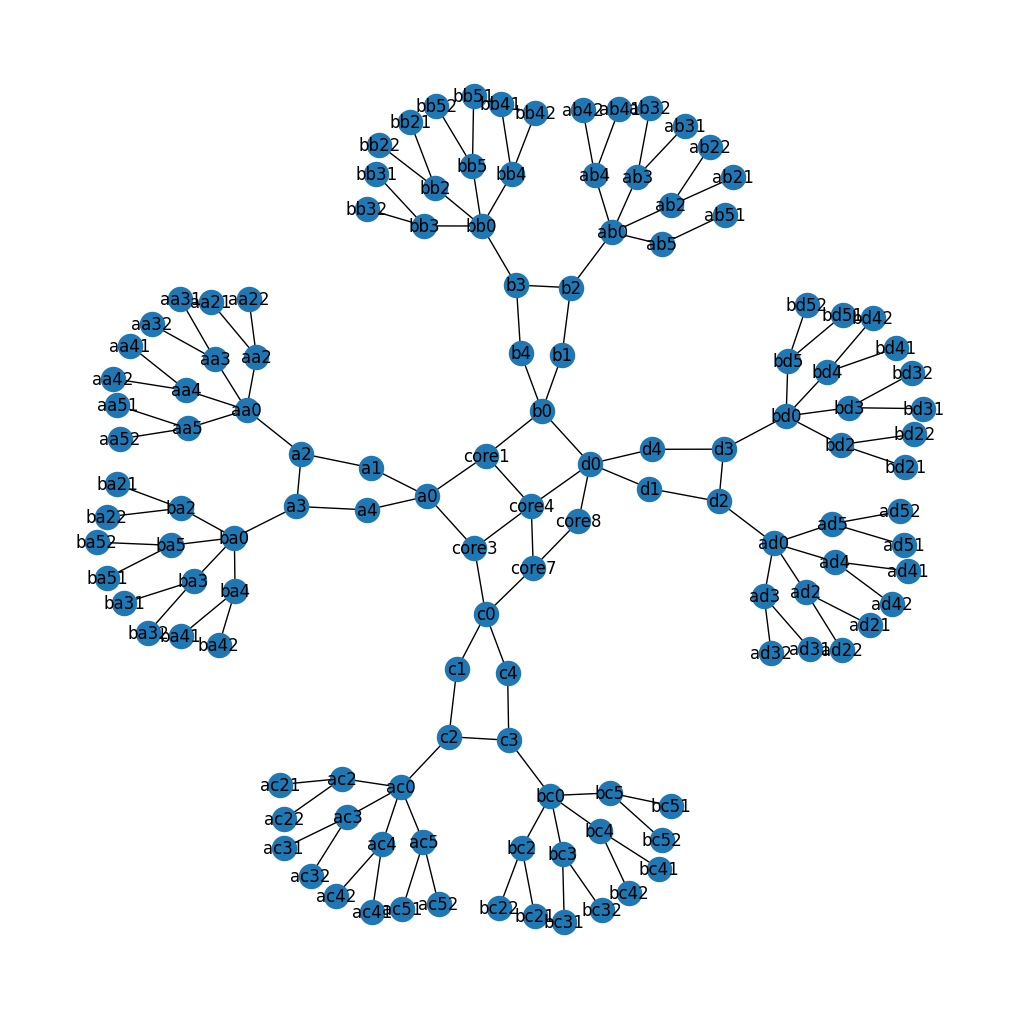

In [165]:
cge_random_1 = ConstructedGraph(seed=student_seed, expanded=True)
cge_random_1 = cge_random_1.delete_random_nodes(n=1)
cge_random_1.histogram()
cge_random_1.draw()


Removed node ab52 using random_fault
Removed node c4 using random_fault
Removed node ac3 using random_fault


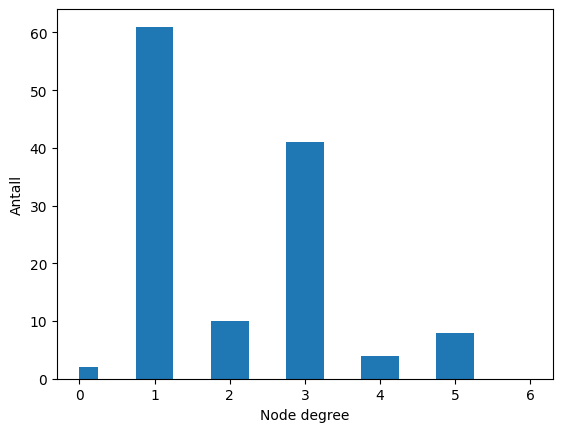

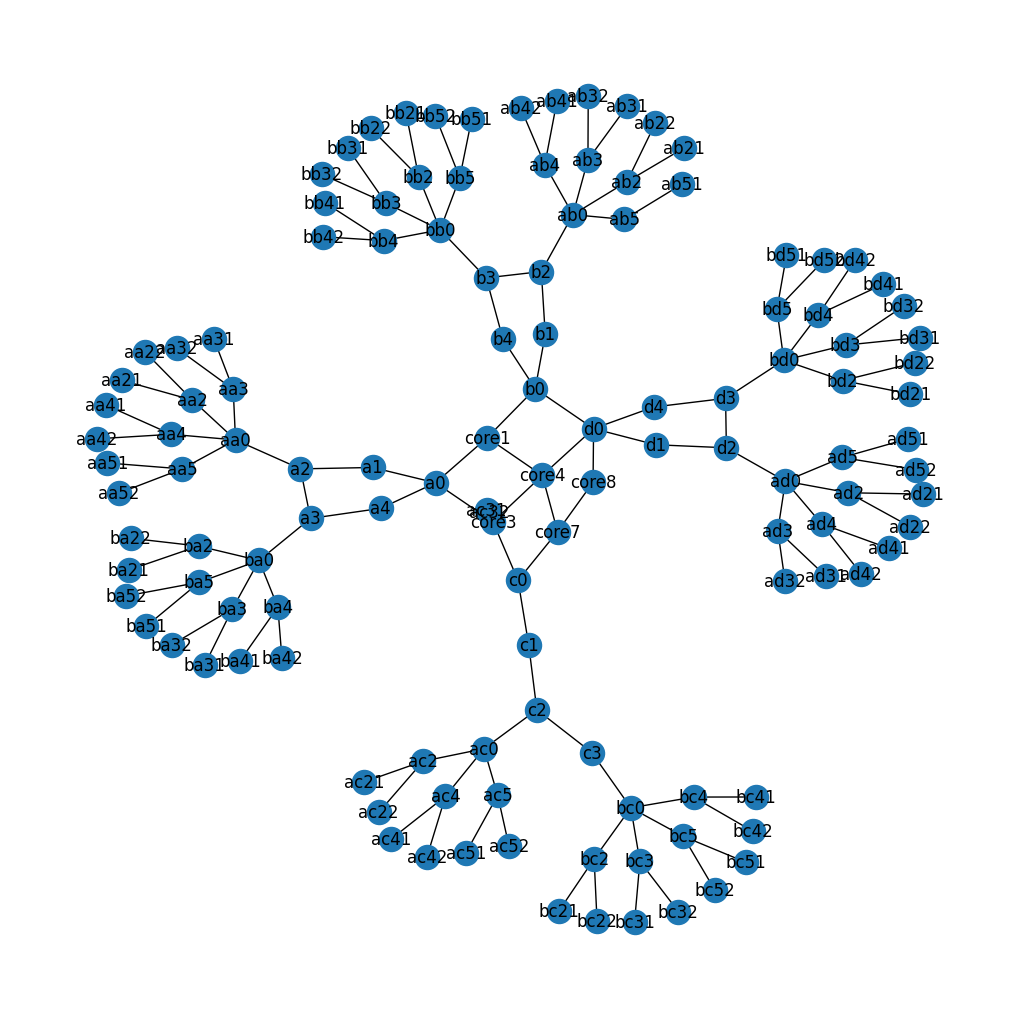

In [166]:
cge_random_3 = ConstructedGraph(seed=student_seed, expanded=True)
cge_random_3 = cge_random_3.delete_random_nodes(n=3)
cge_random_3.histogram()
cge_random_3.draw()


In [167]:
# There are generally far more users / nodes in the access-network. For random errors, it is therefore more
# likely to occur in the access network, instead of the regional or core network, due to the number of 
# nodes. A random error in the access network will have little effect on the performance.
#   
# Of the 4 nodes which were affected by the two removals, 3 of them occured in the local access network. These
# were either on the edge of the graph, or close to the edge of the graph, and neither of them had few connections.
# The last random error occured in the regional network 'c'. By removing c4 (the node, not the explosive), the 
# entire regional network 'c' has become dependent on the nodes c0, c1 and c2. Thus increasing the possibility
# of a major connection-loss in network 'c'. 

## Task 3.3
Try to attack the network using both logical deductions and the methods from task 3.2. The task is to do as much damage as possible to the network, through removing three nodes.

For each node you decide to remove, explain why. 

<em> We expect to see that the students have understood the task and choose to remove three nodes that are very central to the network. We expect to see an explanation/the thinking behind each of the nodes that were removed.</em>

Marked the 3 most important nodes with respect to the closeness centralities


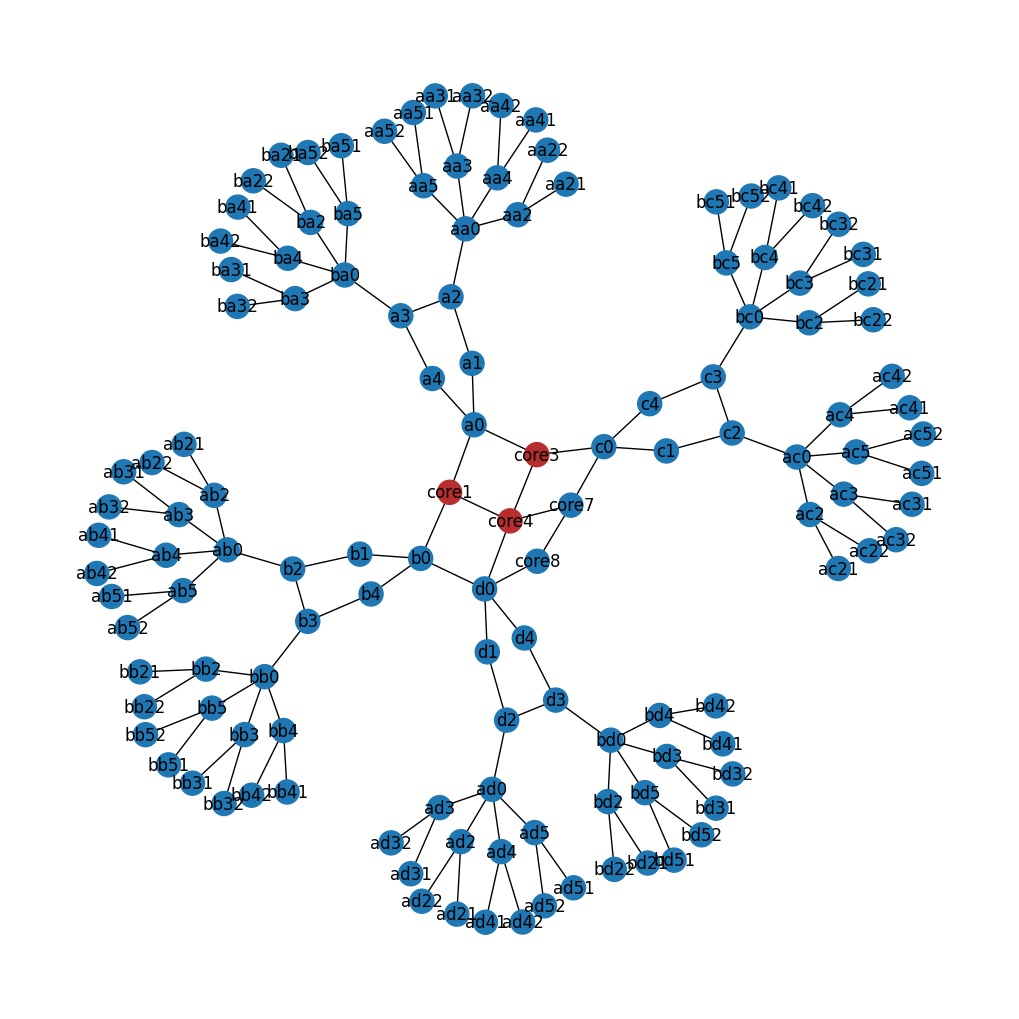

Marked the 3 most important nodes with respect to the betweenness centralities


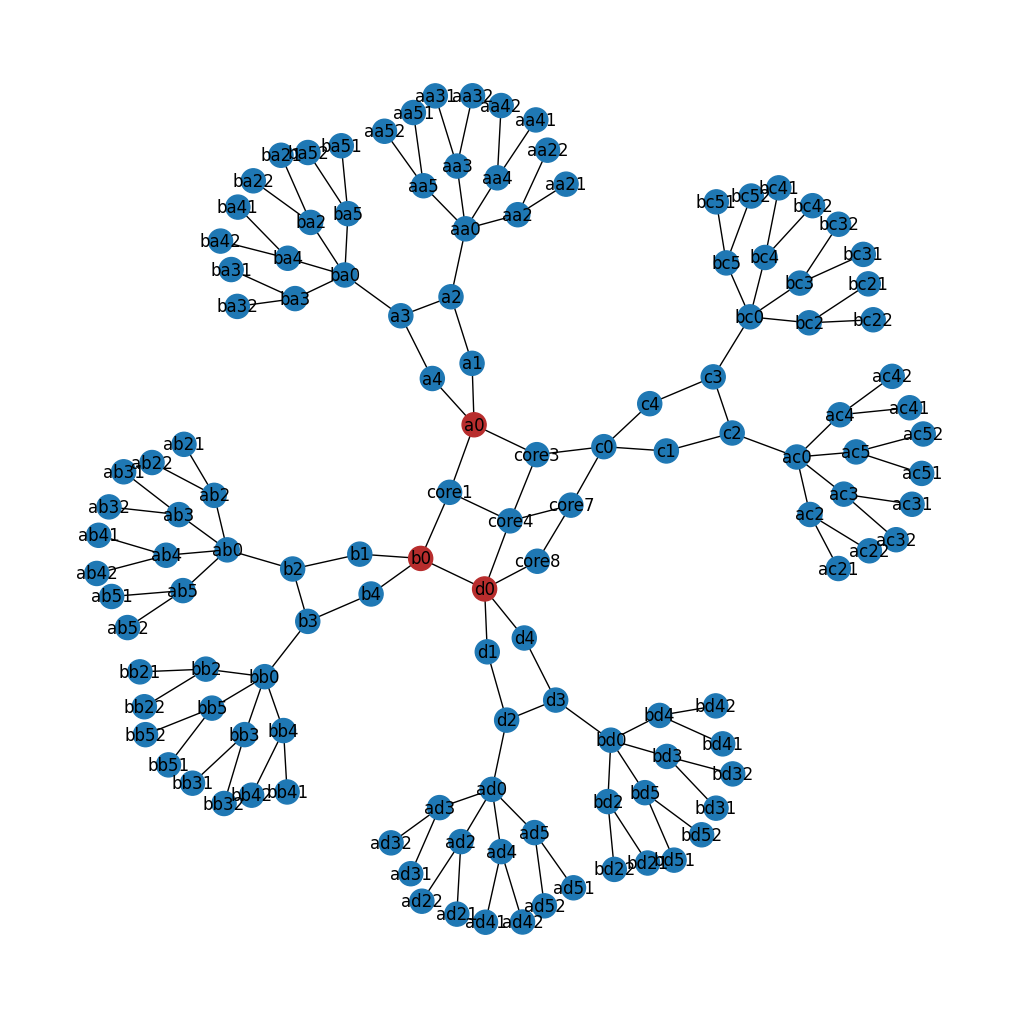

In [168]:
# Showing the three most important nodes with respect to closeness and betweenness centrality

cge_attack = ConstructedGraph(seed=student_seed, expanded=True)

num_sorted = 3 
descending = True

cge_closeness_centralities = cge.closeness_centrality()
cge_betweenness_centralities = cge.betweenness_centrality()

n_sorted_closeness = sort_dictionary_values(cge_closeness_centralities, num_sorted, descending)
n_sorted_betweenness = sort_dictionary_values(cge_betweenness_centralities, num_sorted, descending)

print("Marked the {} most important nodes with respect to the closeness centralities".format(num_sorted))
cge.mark_nodes(get_node_ids(n_sorted_closeness))
plt.show()

print("Marked the {} most important nodes with respect to the betweenness centralities".format(num_sorted))
cge.mark_nodes(get_node_ids(n_sorted_betweenness))
plt.show()


Removed node d0 using betweenness_centrality
Removed node a0 using betweenness_centrality
Removed node core4 using betweenness_centrality


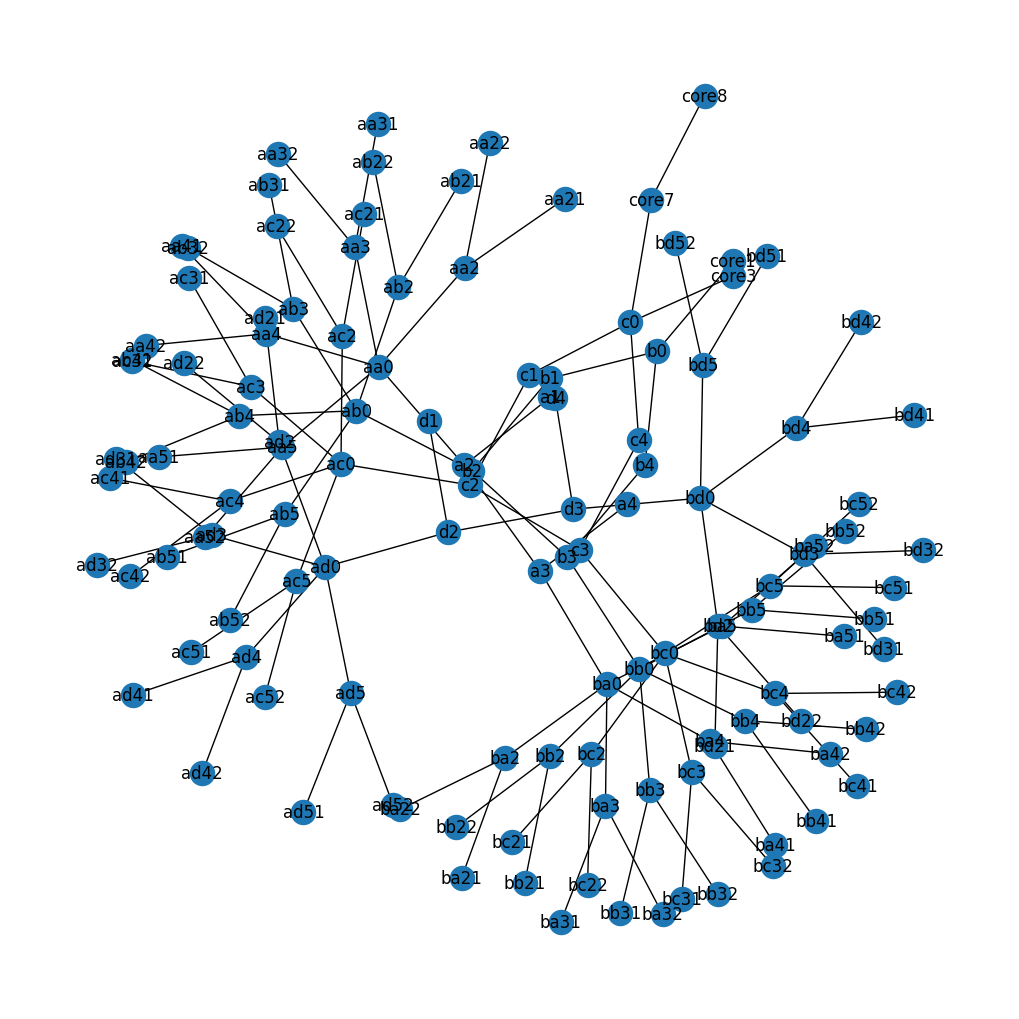

In [169]:
# I assume that if core 1, 3 and 4 is taken out, core 7 and 8 are able to deliver the 
# expected service to regional networks b, c and d. Thus, taking out f.ex. core 1, 3 and 4, 
# will only affect the regional network a, and any previous communication between a and 
# the regional network x.  
 
# To get the most effect out of the attacks, by affecting the most users, it makes sense to 
# attack the regional access points a0, b0 and d0. By attacking these nodes, the entire
# network will be split into four, without any possibilities to communicate between the regions.
# Assuming that major services are connected to the core-network, 3/4 of the end users will
# lose their service
      
# In summary: Attacking a0, b0 and d0, as these will impact the most communication flow 
# in the network. These nodes are single access-points, and attacking these will stop
# communciation flow.  


# Observation:
# a0, b0 and d0 are marked as the most important nodes with respect to betweenness above,
# however delete_nodes_attack(n=3, centrality_index="betweenness") takes out a0, d0 and
# core4. This implies that there might be a bug in my implementation of getting nodes 
# with the highest betweenness centrality. My argumentation, although outdated, is kept.

# Also: 
# It would be nice to have developed some functionality for removing specific nodes from
# the graph, based on their name. Currently - as far as I understand it - it is only
# possible to delete with respect to a centrality index. 

cge_attack = cge_attack.delete_nodes_attack(n=3, centrality_index="betweenness")
cge_attack.draw()


## Task 3.4
A way to determine the damage done to the network is to use the size of the largest component or to look at the node degree through a histogram. 

Use these methods to discuss the damage resulting from your attacks on the network as done in tasks 3.2 and 3.3.

<em> We expect to see that students manage to draw a histogram and use the method to find the size of the largest component. We furthermore expect to see an explanation of the consequences in the two prior tasks and that students understand the seriousness of intented attacks.</em>

Histogram for random errors on three nodes


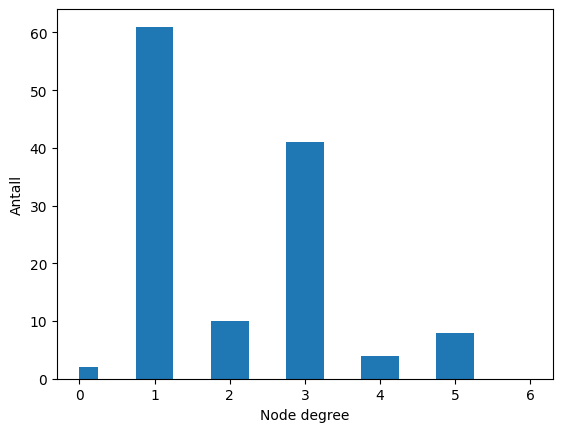

Histogram for deliberate attacks on three nodes


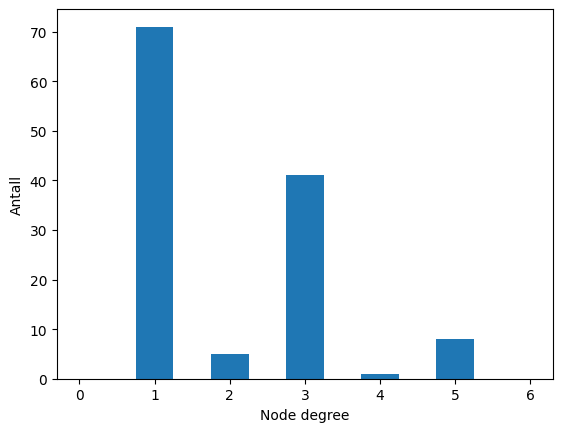

Original largest component: 129
Largest component with random three errors: 124
Largest component with three nodes attacked: 34


In [170]:
# Comparing the response of removing 3 nodes at random vs removing three nodes deliberately
print("Histogram for random errors on three nodes")
cge_random_3.histogram()

print("Histogram for deliberate attacks on three nodes")
cge_attack.histogram()

print("Original largest component: {}".format(cge.get_largest_components_size()))
print("Largest component with random three errors: {}".format(cge_random_3.get_largest_components_size()))
print("Largest component with three nodes attacked: {}".format(cge_attack.get_largest_components_size()))

In [171]:
# The random errors have as expected occured at nodes with a low node degree. 
# Several nodes have reduced from a degree of 1 to a degree of 0. As written
# previously, removing these nodes have little impact on the overall performance
# of the network. Mostly the end users are impacted, while the regional and the
# core networks are operating. This is supported by the largest component, which
# is nearly identical to the original largest component.  

# The deliberate attacks impacted nodes with a degree of 4 most. These are nodes
# in the core and the access-points to the regional networks which were removed.
# As written previously, the removal of this network has severe impacts on the network
# performance. It is shown by the largest component, which is nearly a quarter of the
# original.

# The largest component is the number of connected nodes in a subgraph. With the
# random attacks having roughly the same largest component as the original network,
# nodes on the perimiter of the network, or where there exist another path (like a
# ring network) have been cut. 
# With the deliberate attacks having a far smaller largest component, the overall
# length of the graph is dramatically reduced. This means that the major nodes in
# the network is affected, where there are no other way of communicating.           


## Task 3.5
Explain what is meant by the notion "size of the largest component". What are advantages and disadvantages with using the size of the largest component or a histogram as a measure for reliability? Is this reasonable in our case? 

<em> We expect to see that the students have understood the notion of "size of the largest component" and why this can be used to show vulnerabilities. We also expect a short text explaining why/why not it can be a good idea to use the largest component size or the a histogram as the only measure of reliability.</em>

In [172]:
# See 3.4 for size of largest component

# Advantages:
#   - intuitive methods of quantifying how robust the network is to errors  
 
# Disadvantages:
#   - can be difficult to identify which nodes are the problems in the network 
# 
#   - a quantitative analysis does not take the length or the quality of the path
#     into consideration. In reality, the bandwith of each network will be different.
#     A local connection between two different access-network (using a single ethernet-cable 
#     f.ex.) is assumed by these quantitative methods as a valid connection, where data
#     could be rerouted in case of an error. In reality, it would not be able to operate
#     due to the bandwith limitations
# 
#   - using these methods effectively requires some prior information from betweenness-centrality
#     or similar, such that one could compare the networks before and after the removal of
#     these nodes    


## Task 3.6
Below you see a method to construct a graph that compares attacks with different methods. Use the method on the original network and compare with the same network to which you have added three extra edges redundancy. Discuss concisely the effects of extra redundancy.

<em> We expect to see that students manage to use the given method and to point out the damage done to the original network. Furthermore, we expect to see that students manage to add an extra three edges of redundancy and that they can explain why they chose these three edges. Finally, we expec tot see a short discussion of the effects of adding extra edges to a network. </em>

In [173]:
def get_attack_graph(G):
    count = G.number_of_nodes()
    outputs = [[0 for _ in range(count)] for _ in range(4)]
    graphs = [G for _ in range(4)]
    x = range(0,count)

    for i in x:
        for j, graph in enumerate(graphs):
            outputs[j][i] = graphs[j].get_largest_components_size()
        graphs[0] = graphs[0].delete_random_nodes(print_result=False)
        graphs[1] = graphs[1].delete_nodes_attack(centrality_index="degree",print_result=False)
        graphs[2] = graphs[2].delete_nodes_attack(centrality_index="closeness",print_result=False)
        graphs[3] = graphs[3].delete_nodes_attack(centrality_index="betweenness",print_result=False)

    bc1,bc2,bc3,bc4 = outputs
    plt.plot(x,bc1,color="red",label="Random faults")
    plt.plot(x,bc2,color="green",label="Degree centrality")
    plt.plot(x,bc3,color="blue",label="Closeness Centrality")
    plt.plot(x,bc4,color="orange", label="Betweenness Centrality")
    plt.ylabel("Size of the largest component")
    plt.xlabel("Amount of nodes in removed")
    plt.legend(loc="upper right")
    plt.show()


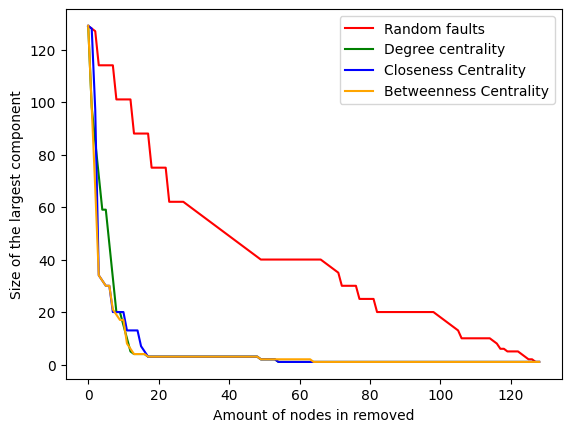

In [174]:
cge_attack_graph = get_attack_graph(cge)
# cge.draw()

# One can see that the original graph is somewhat robust against random faults,
# with respect to the size of the largest component. 
# The centralities however, quickly collapse with few nodes removed  

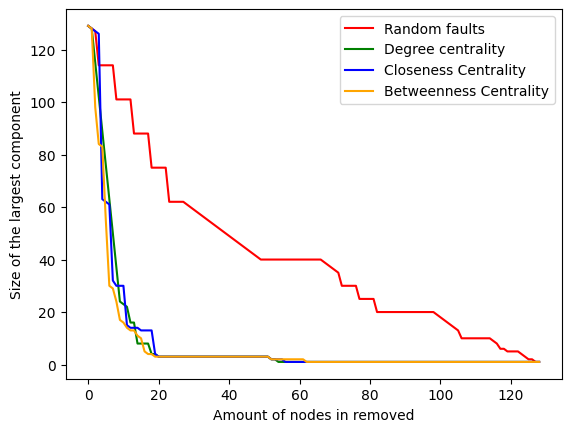

In [175]:
# It is thought to add edges between the regional networks. This makes each of the
# regional networks less dependent on the nodes a0, b0, c0, d0. The regional 
# communications will still be available if the core networks are unavailable. 
# Adding extra edges:
# b1 <-> a4
# a1 <-> c4
# c1 <-> d4 

cge_added_regional_edges = ConstructedGraph(seed=student_seed, expanded=True)

extra_edges_between_nodes_str_names = [("b1", "a4"), ("c1", "d4"), ("a1", "c4")]
cge_added_regional_edges.add_edges_from(extra_edges_between_nodes_str_names)   
get_attack_graph(cge_added_regional_edges)
# cge_added_regional_edges.draw()


# Adding these edges appears to add little effect with respect to the performance.
# The graph marking the random faults, appear directly identical. I had 
# expected this to improve somewhat

# The centralities remain a bith higher as nodes are removed, which implies that 
# more of the the network manages to remain intact. This is especially true for 
# the betweenness-centrality and the closeness-centrality        

## Part 4: Securing VDES

You are now an employed as a security engineer in VDES; your task is to secure the network against attacks, both with malicous intent and random failures. Here it will be important to analyse the network, find low-hanging fruits and add extra edges redundancy where needed, without increasing the cost too much. Use the methods you learned in the exercise so far to analyse and secure the network. Explain your choices. Deduce consequences that result if malicious agents obtain informations about your network. 

Your analysis should show a thorough understanding of graph theory and graphtheoretical structural analysis. Your use of relevant notions will be especially considered during assesment. The task should be answered in a concise manner and comprise a maximum of 800 word. Begin the task with showing a picture of the network and reference to figures, histograms and graphs as to how you want to secure the network. Experiment with adding extra redundancy, test attacks and assess the effectiveness with histograms and the node degree. You can use <\code> get_attack_graph()<\code> Give recommendations as to how the network can be better secured against attacks, based on your findings. 

The network you should analyse can be got if you run the code block below:

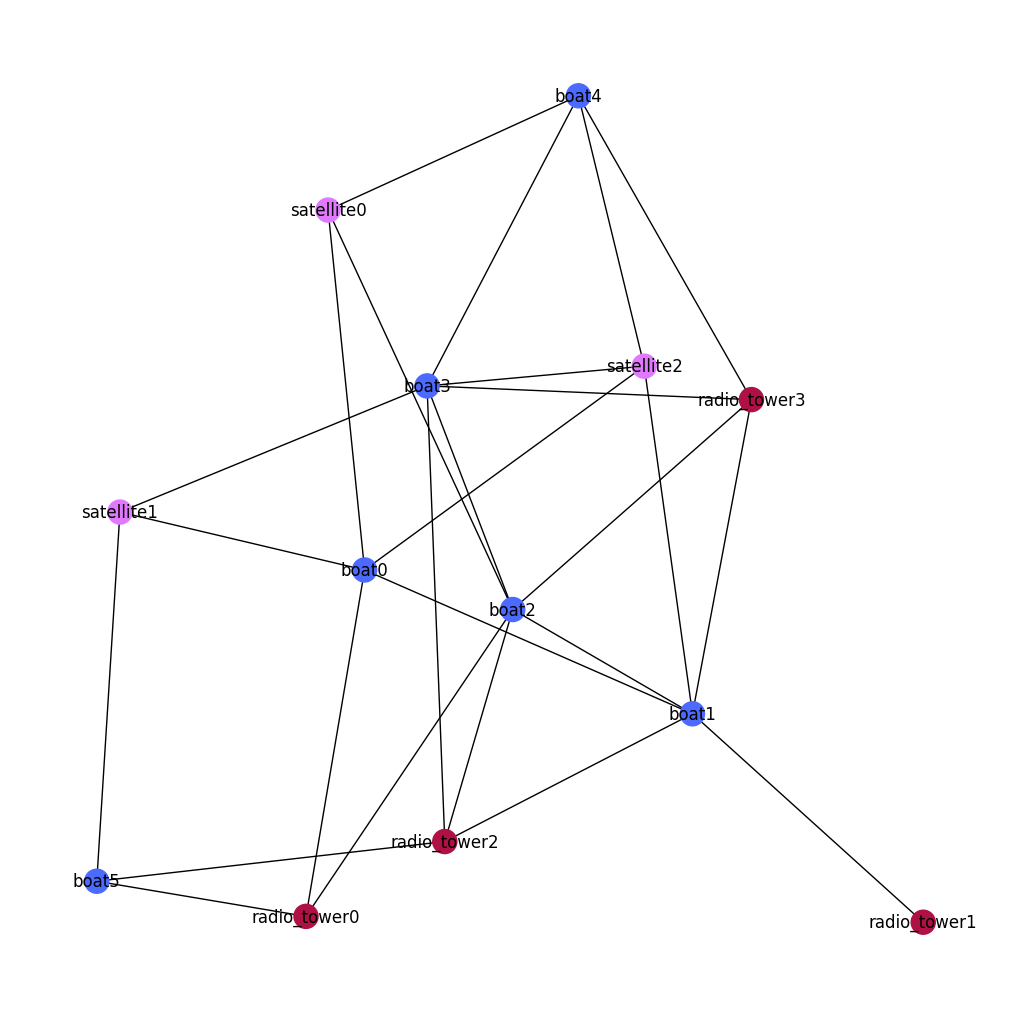

In [176]:
random.seed(student_seed)
boat_count = random.randint(4,7)
satellite_count = random.randint(1,3)
radio_tower_count = random.randint(2,4)

vdes_graph = VDESGraph(boat_count,satellite_count,radio_tower_count)
vdes_graph.draw()

Degree centrality


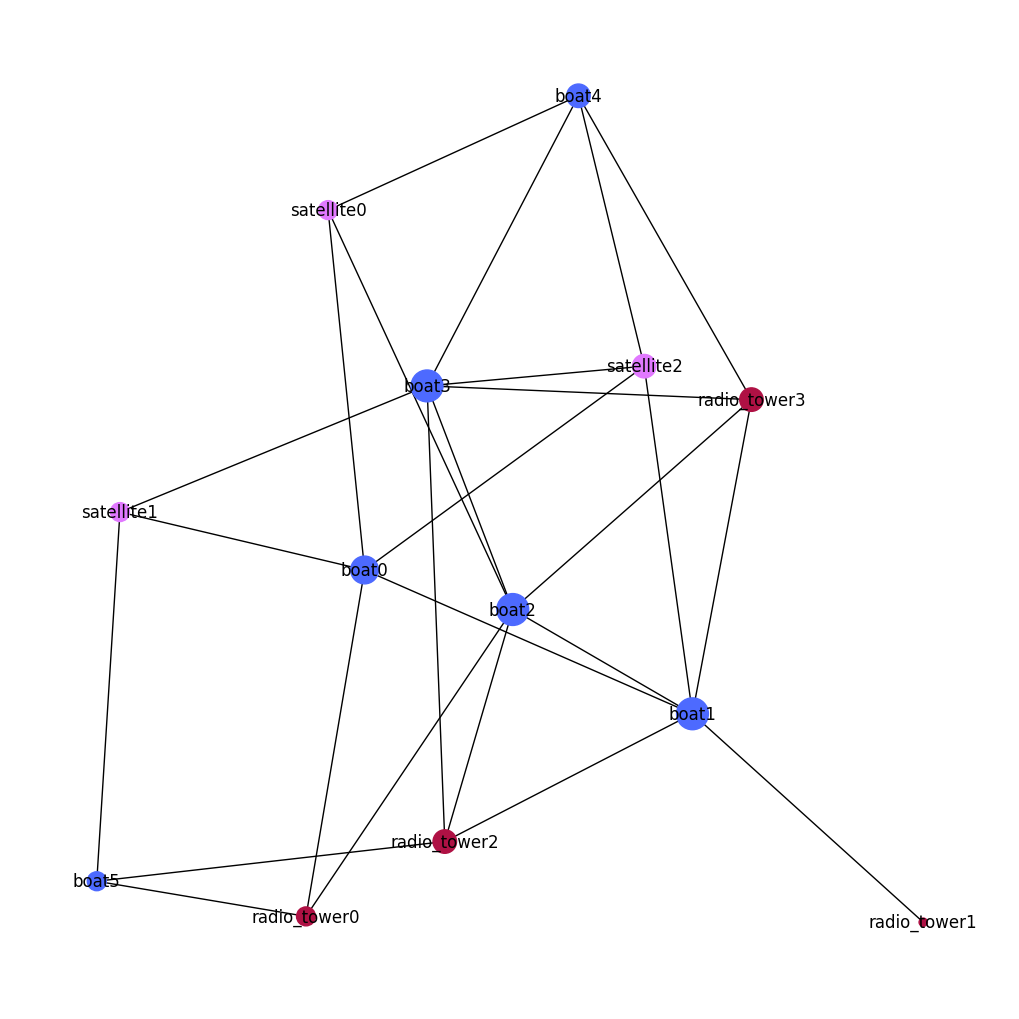

Closeness centrality


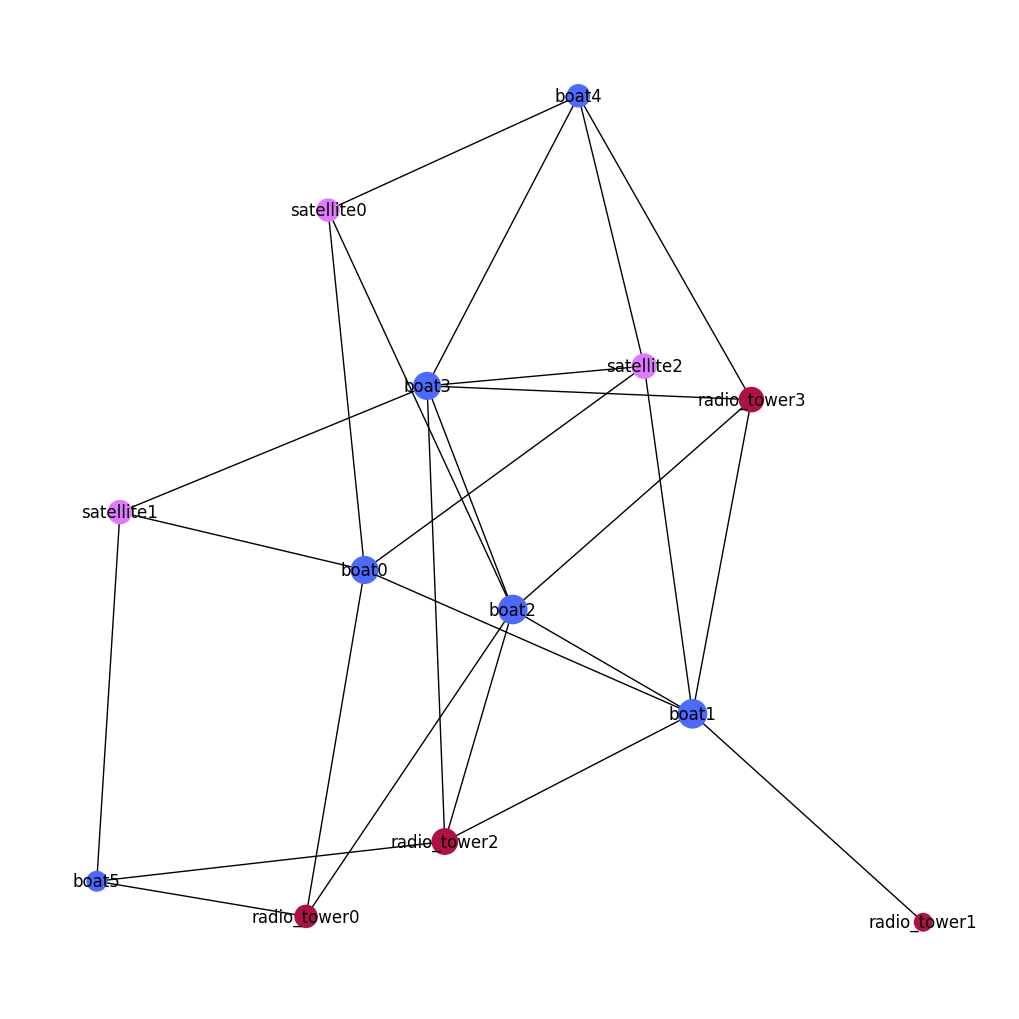

Betweenness centrality


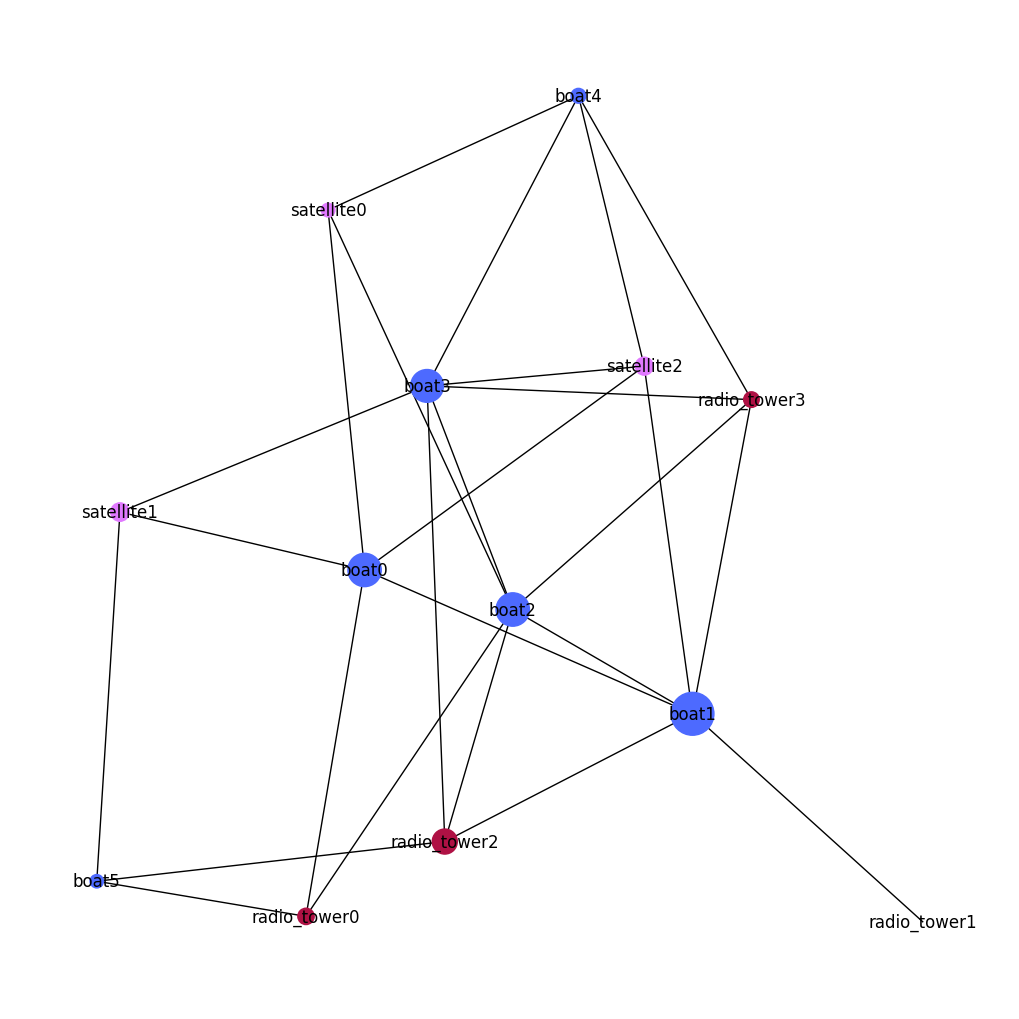

In [177]:
# Analysing the centralities in the network by drawing which nodes are most important
print("Degree centrality")
vdes_graph.draw_degree_centrality()

print("Closeness centrality")
vdes_graph.draw_closeness_centrality()

print("Betweenness centrality")
vdes_graph.draw_betweenness_centrality()


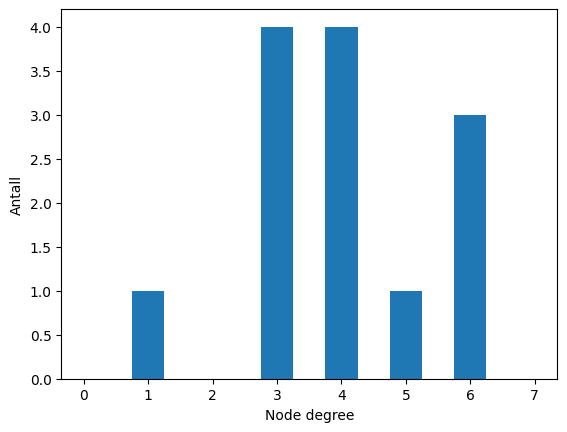

[0, 1, 0, 4, 4, 1, 3]

In [178]:
# Getting the histogram for the network
vdes_graph.histogram()

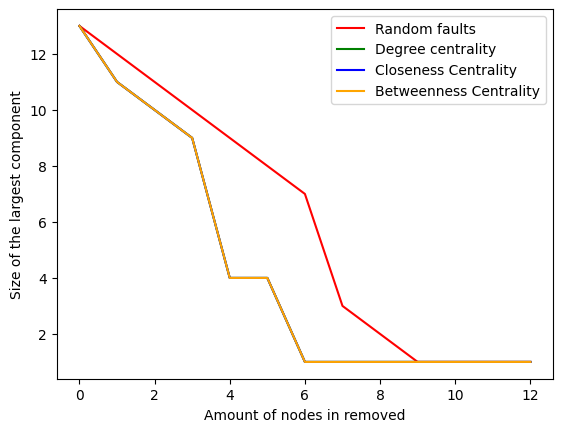

In [179]:
# Getting the attack graph
get_attack_graph(vdes_graph)

In [180]:
# Based on the figures, one can see that:
# - a lot of the communication between the systems are directly through boats 0, 1, 2, 3
# - there is no communication between any of the radio towers
# - there is no communication between any of the satellites
# - there is no communication between the radio towers and the satellites 

# With the loss of vdes of a nearby ship, either by accident or attack, the network
# cannot transmit information to other ships, satellites, radio towers

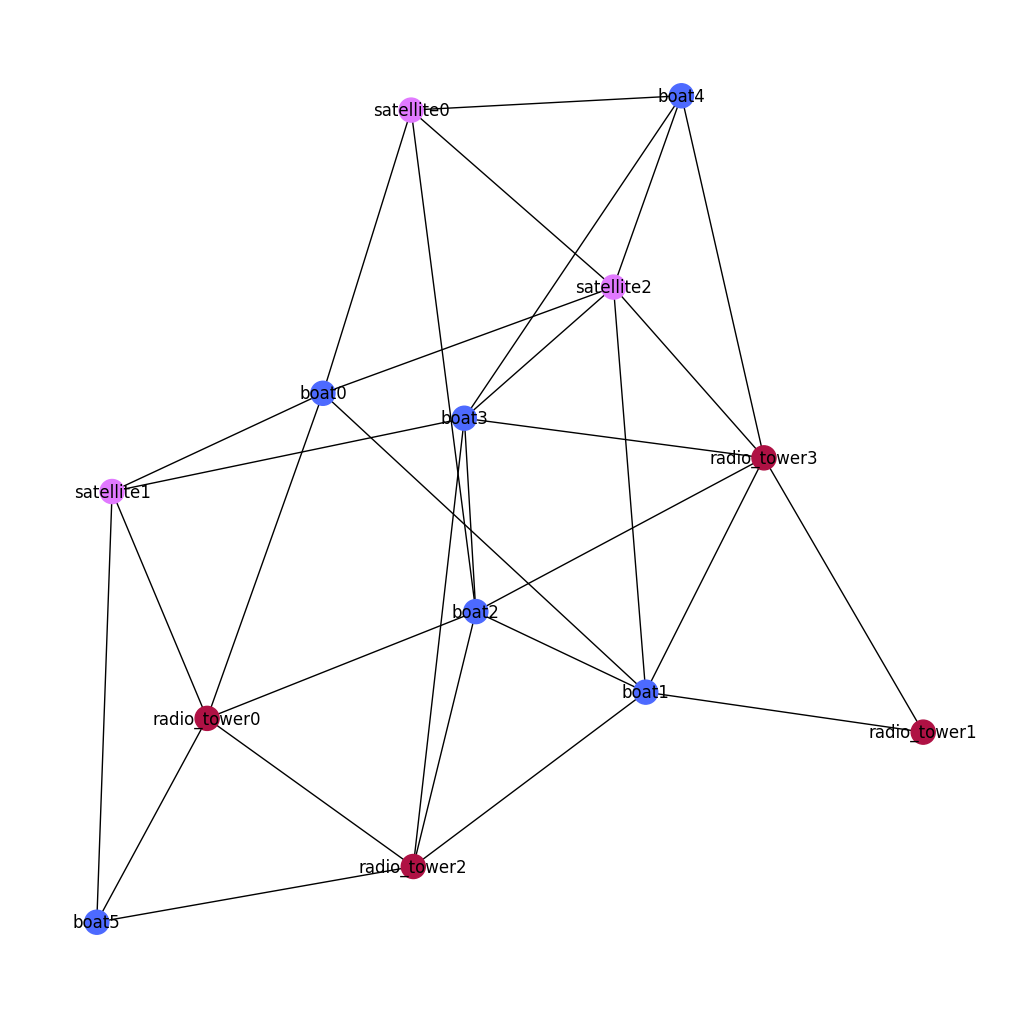

In [184]:
# A possible solution is to add connections between some of the radio-towers and
# some of the satellites. All are not added, since it could be a large distance
# between the systems, or the curvature of the earth could hide some satellites

# One could argue that radio-towers are assumed vital for the system, and should 
# be implemented in a costly ring-structure. 
# This is not done, as one could have towers installed on f.ex. Svalbard, Iceland, 
# Novia Scotia, which would be extremely expensive to implement in a ring-structure.  

# Adding conenctions:
# radio_tower_0 <-> radio_tower_2
# radio_tower_1 <-> radio_tower_3
# radio_tower_0 <-> satellite_1
# radio_tower_3 <-> satellite_2
# satellite_2 <-> satellite_0

vdes_graph_added_edges = VDESGraph(boat_count,satellite_count,radio_tower_count)

radio_tower_connections_list = [("radio_tower0", "radio_tower2"), ("radio_tower1", "radio_tower3")]
satellites_connections_list = [("satellite0", "satellite2")]
radio_tower_and_satellite_connections_list = [("radio_tower0", "satellite1"), ("radio_tower3", "satellite2")]

connections_list = radio_tower_and_satellite_connections_list + satellites_connections_list + radio_tower_connections_list
vdes_graph_added_edges.add_edges_from(connections_list)
vdes_graph_added_edges.draw()


Degree centrality


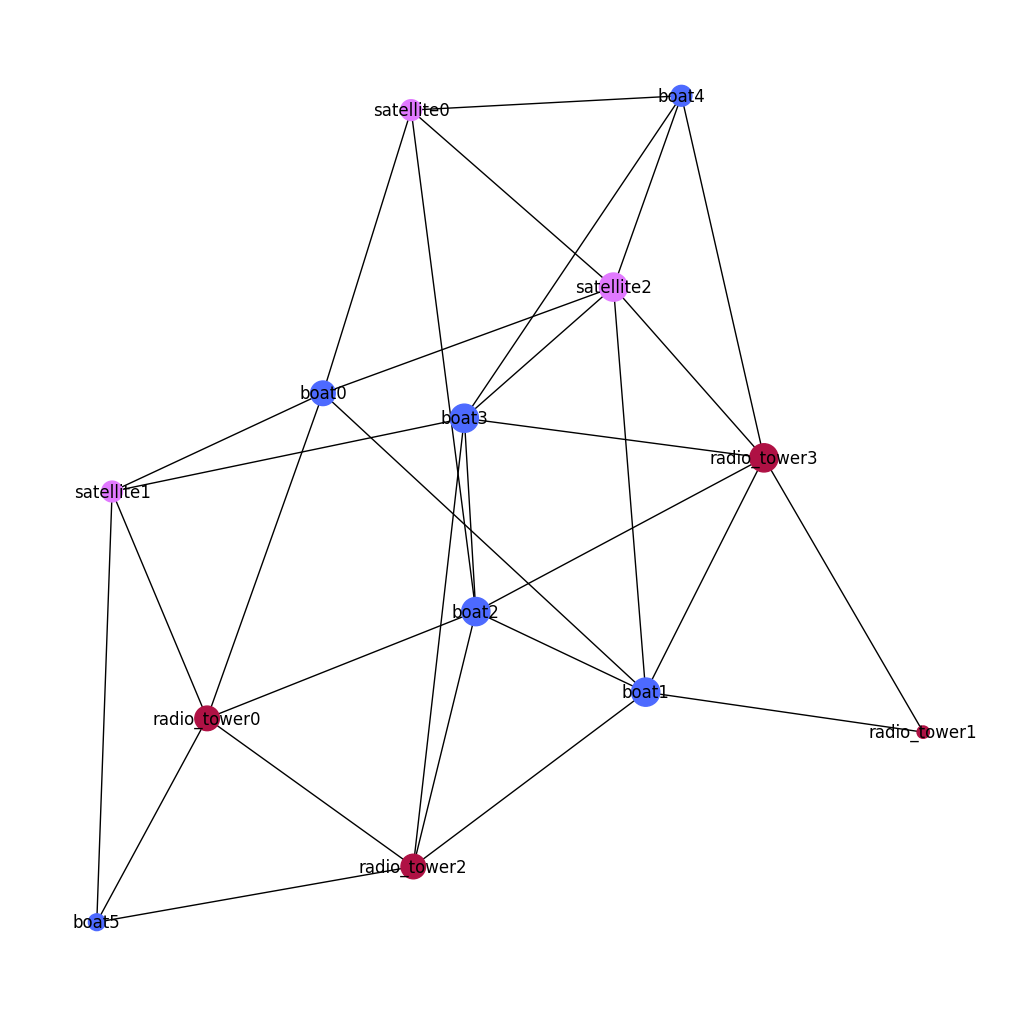

Closeness centrality


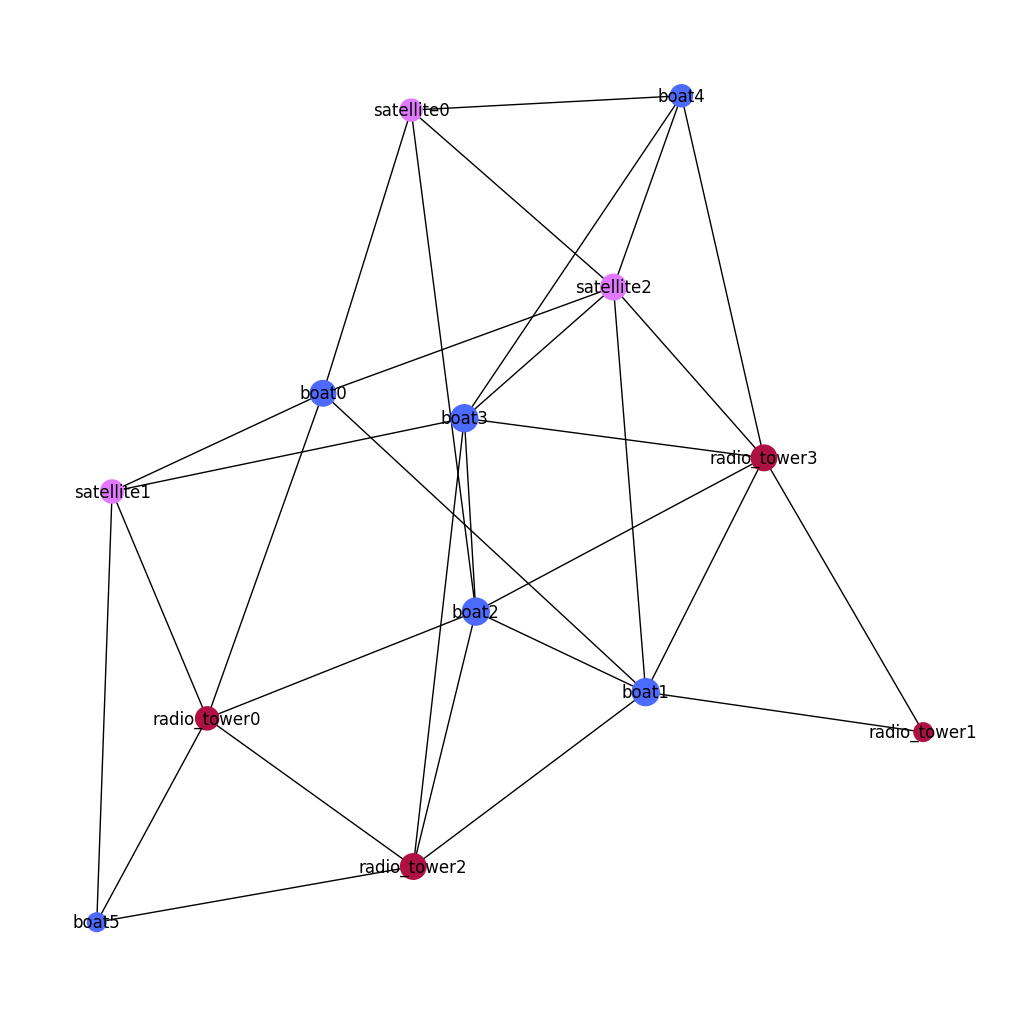

Betweenness centrality


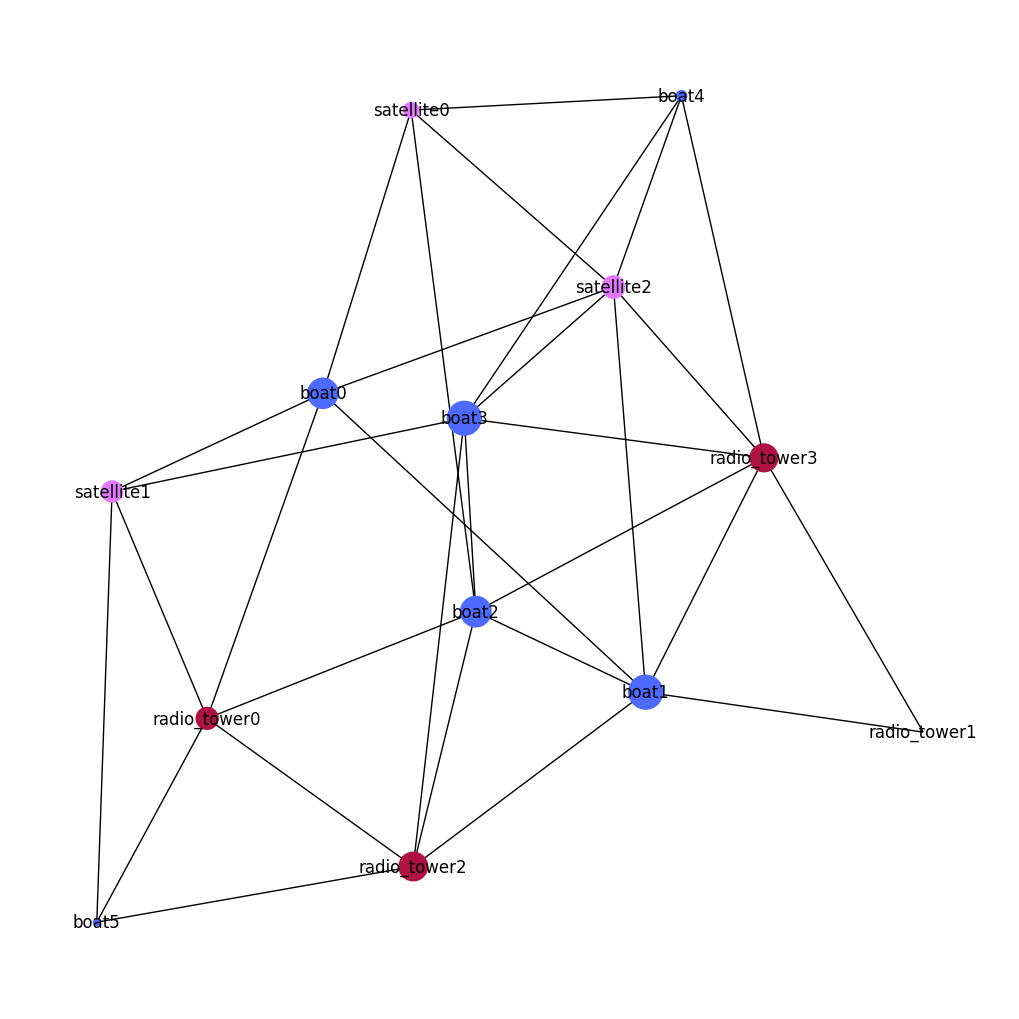

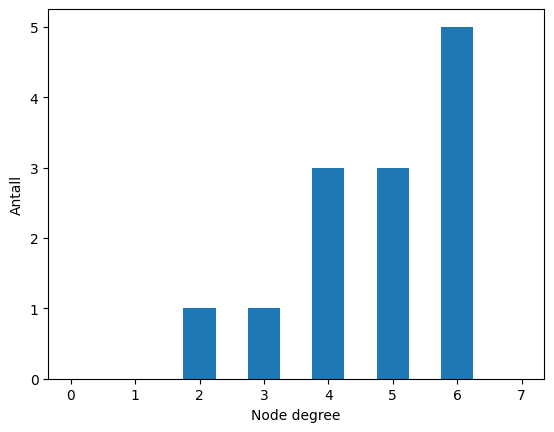

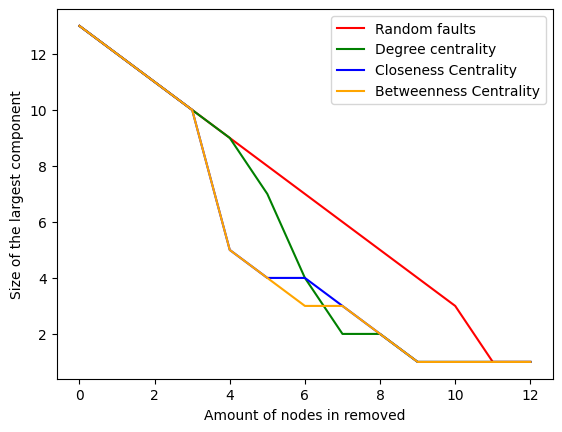

In [187]:
print("Degree centrality")
vdes_graph_added_edges.draw_degree_centrality()

print("Closeness centrality")
vdes_graph_added_edges.draw_closeness_centrality()

print("Betweenness centrality")
vdes_graph_added_edges.draw_betweenness_centrality()

vdes_graph_added_edges.histogram()

get_attack_graph(vdes_graph_added_edges)

In [186]:
# By just adding connections between some of the radio towers and some
# of the satellites, the system has become more robust against random errors.
# However, the boats are still the most important aspect of this network.
# If boats 0, 1, 2, 3 are lost, the infrastructure is separated.

# I do not think it is realistic to add extra edges between the boats and the 
# radio towers or the satellites, as the equipment on the boats should 
# connect to whatever infrastructure nearby.

# It is possible to have at least one satellite for connecting the radio-towers.
# Either developing own satellites, or using existing satellites. This will be
# cheaper than creating a ring structure between radio-towers on the UK, Canada,
# Norway, Iceland, etc. 
# One could therefore propose a connection between a satellite and all radio towers
# or all satellites as a future improvement, but it will not be analysed in this
# assignment      

Removed node boat4 using random_fault
Removed node satellite2 using random_fault


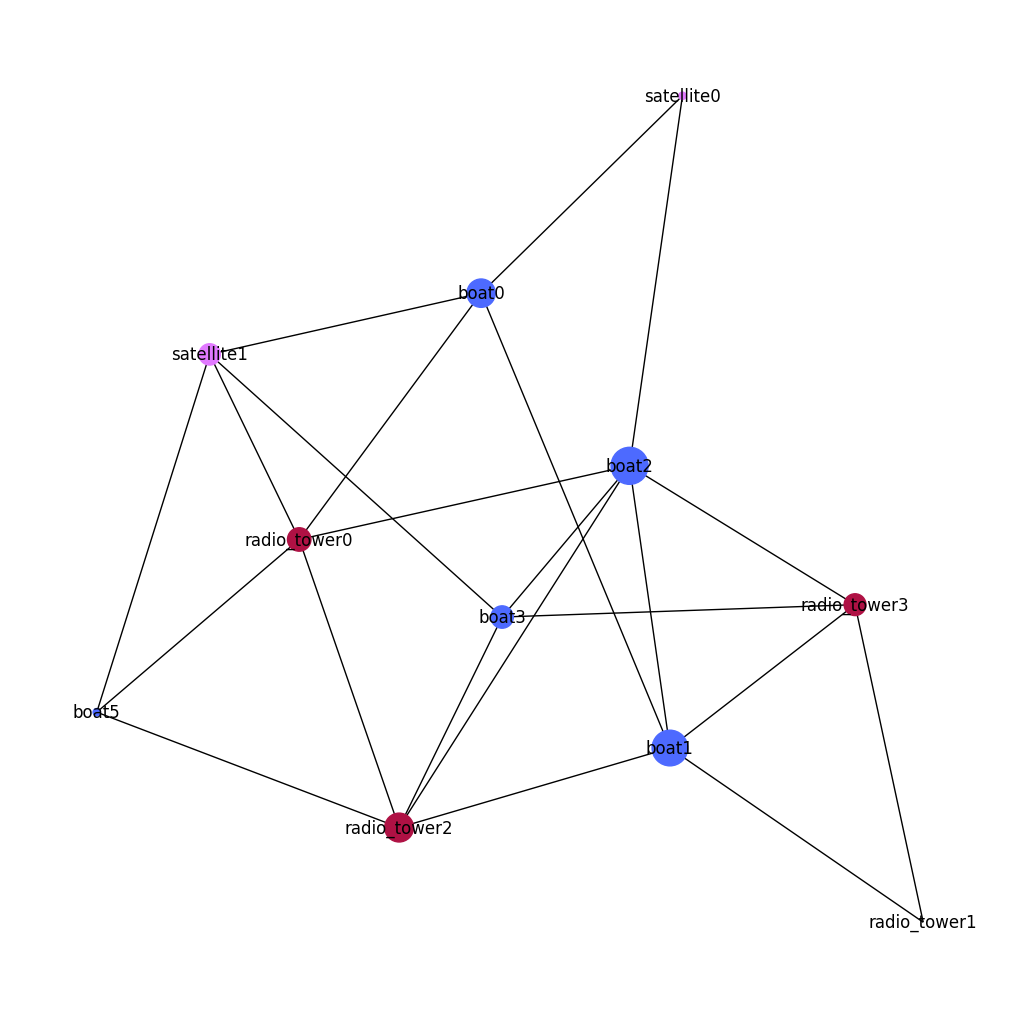

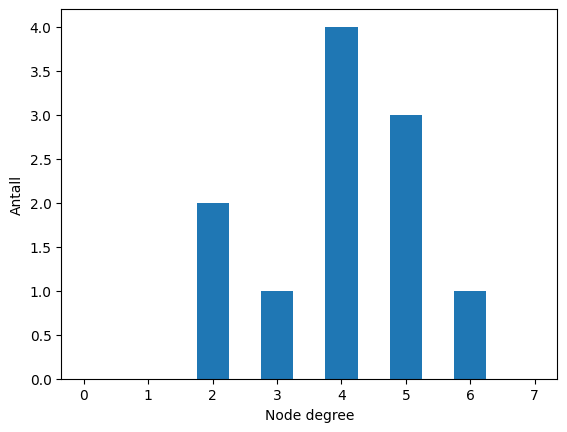

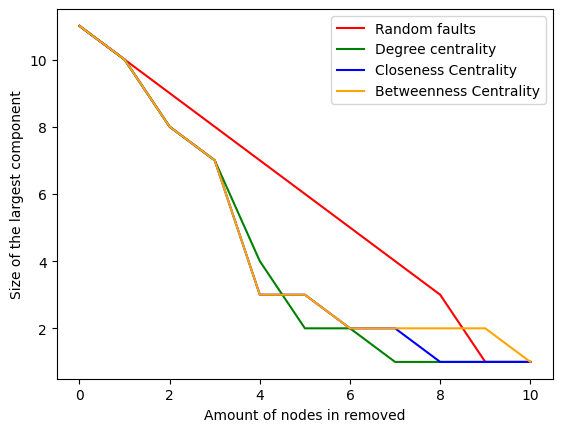

In [196]:
# Removing 2 random nodes
num_nodes_removed = 2

vdes_graph_random_nodes_removed = vdes_graph_added_edges.delete_random_nodes(n=num_nodes_removed)
# vdes_graph_random_nodes_removed.draw()
vdes_graph_random_nodes_removed.draw_betweenness_centrality()
vdes_graph_random_nodes_removed.histogram()
get_attack_graph(vdes_graph_random_nodes_removed)


Removed node boat1 using betweenness_centrality
Removed node boat3 using betweenness_centrality


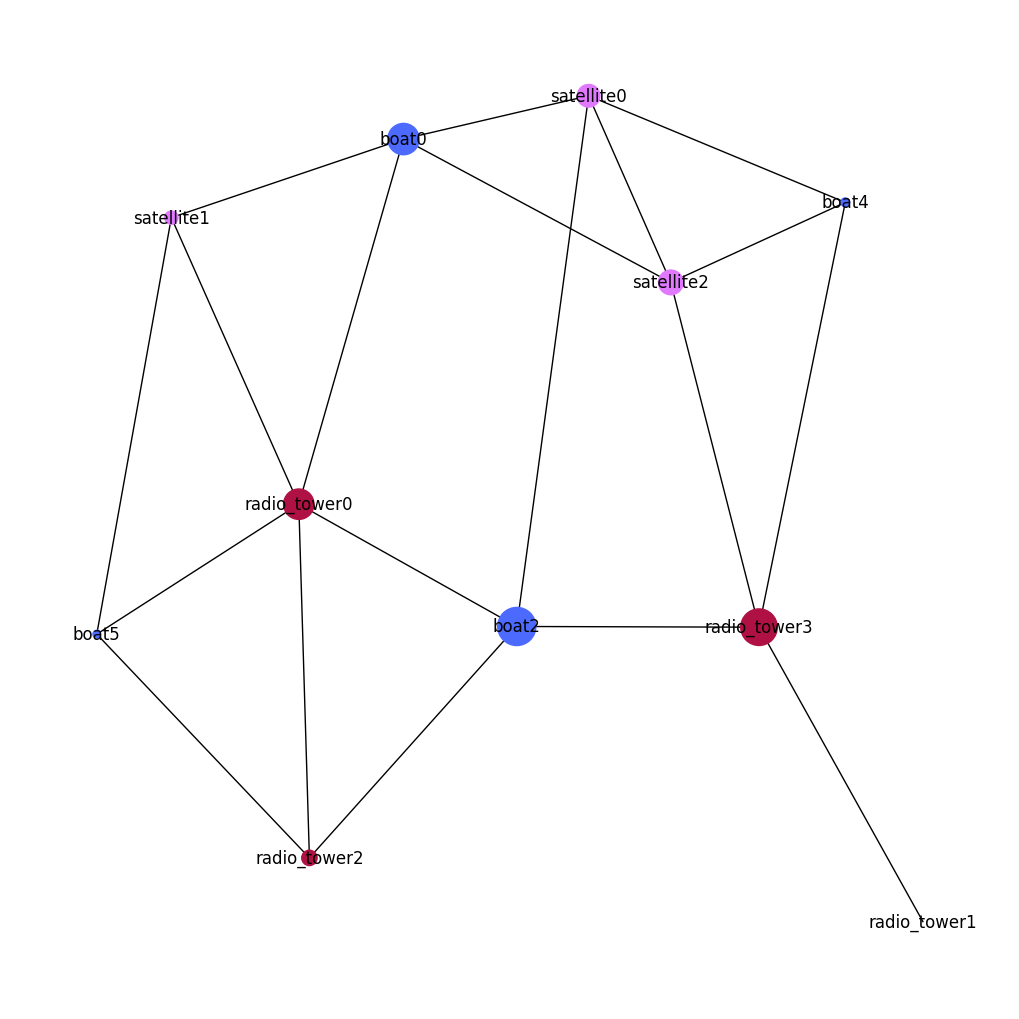

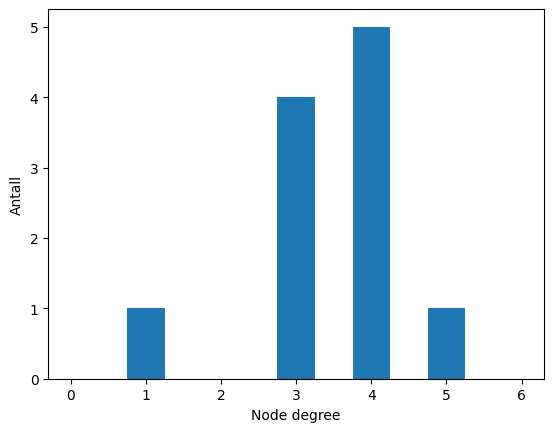

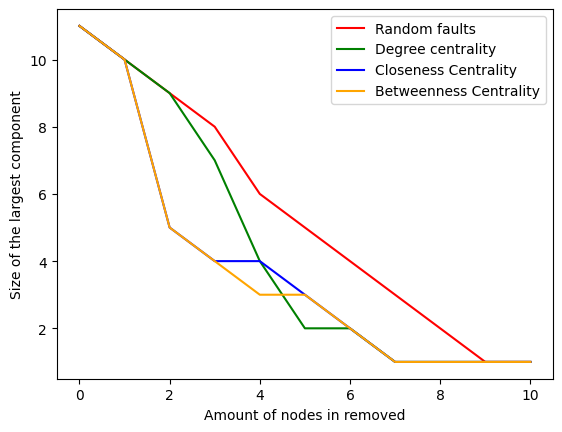

In [197]:
num_nodes_attacked = 2

vdes_graph_attacked_nodes_removed = vdes_graph_added_edges.delete_nodes_attack(n=num_nodes_attacked, centrality_index="betweenness")
# vdes_graph_attacked_nodes_removed.draw()
vdes_graph_attacked_nodes_removed.draw_betweenness_centrality()
vdes_graph_attacked_nodes_removed.histogram()
get_attack_graph(vdes_graph_attacked_nodes_removed)

In [198]:
# With the added edges into the network as described above, it manages to 
# maintain communication between the infrastructure, since two of the boats 
# maintain the connections between the sets of radio-towers and satellites.

# If malicious attackers acquire information that the VDES is vulnerable to
# attacks on the ships, these will be attacked. Assuming the attacks are
# succesfull, or the ships move out of communication range to the infrastructure,
# the infrastructure risk being split into two separate parts. This is under
# the assumptions that:
#   - it is limited economic or political resources to get a direct connection
#     between the radio towers
#   - no satellites are designated to maintain communications in an area
#   - one cannot add extra edges between the ships, as the CDES there should 
#     connect to whatever service is available  

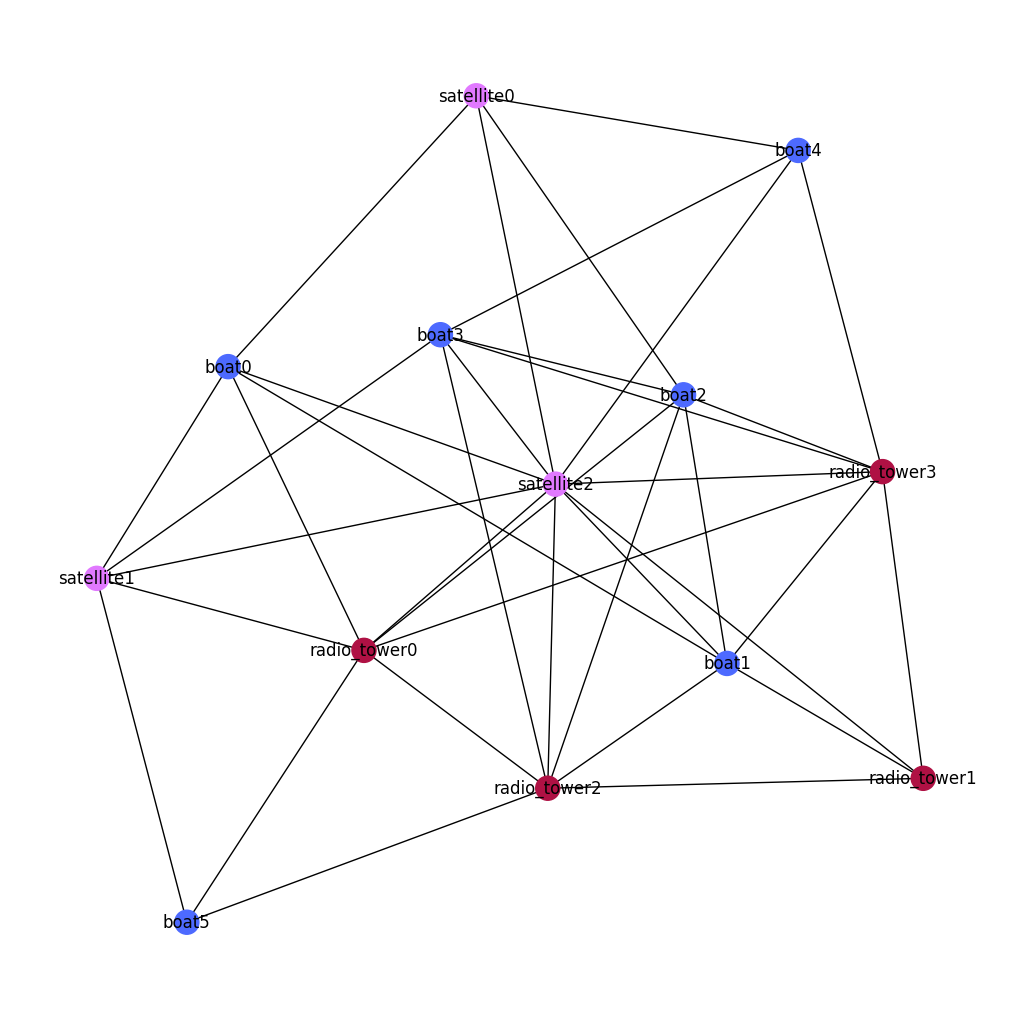

In [200]:
# If there are sufficient funding, I propose to add at least one satellite
# to maintain communication between other satellites and the radio towers,
# and implementing the radio towers in a ring. This will be costly, but it
# will be robust, and will work without a ship in the area

# The following plots shows the graph which occurs 
robust_vdes_graph = VDESGraph(boat_count, satellite_count, radio_tower_count)

radio_tower_connections_list = [("radio_tower0", "radio_tower2"), ("radio_tower1", "radio_tower3"), ("radio_tower0", "radio_tower3"), ("radio_tower1", "radio_tower2")]
satellites_connections_list = [("satellite0", "satellite2"), ("satellite1", "satellite2")]
radio_tower_and_satellite_connections_list = [("radio_tower0", "satellite1"), ("radio_tower3", "satellite2"), ("radio_tower2", "satellite2"), ("radio_tower0", "satellite2"), ("radio_tower1", "satellite2")]

connections_list = radio_tower_and_satellite_connections_list + satellites_connections_list + radio_tower_connections_list
robust_vdes_graph.add_edges_from(connections_list)
robust_vdes_graph.draw()

Degree centrality


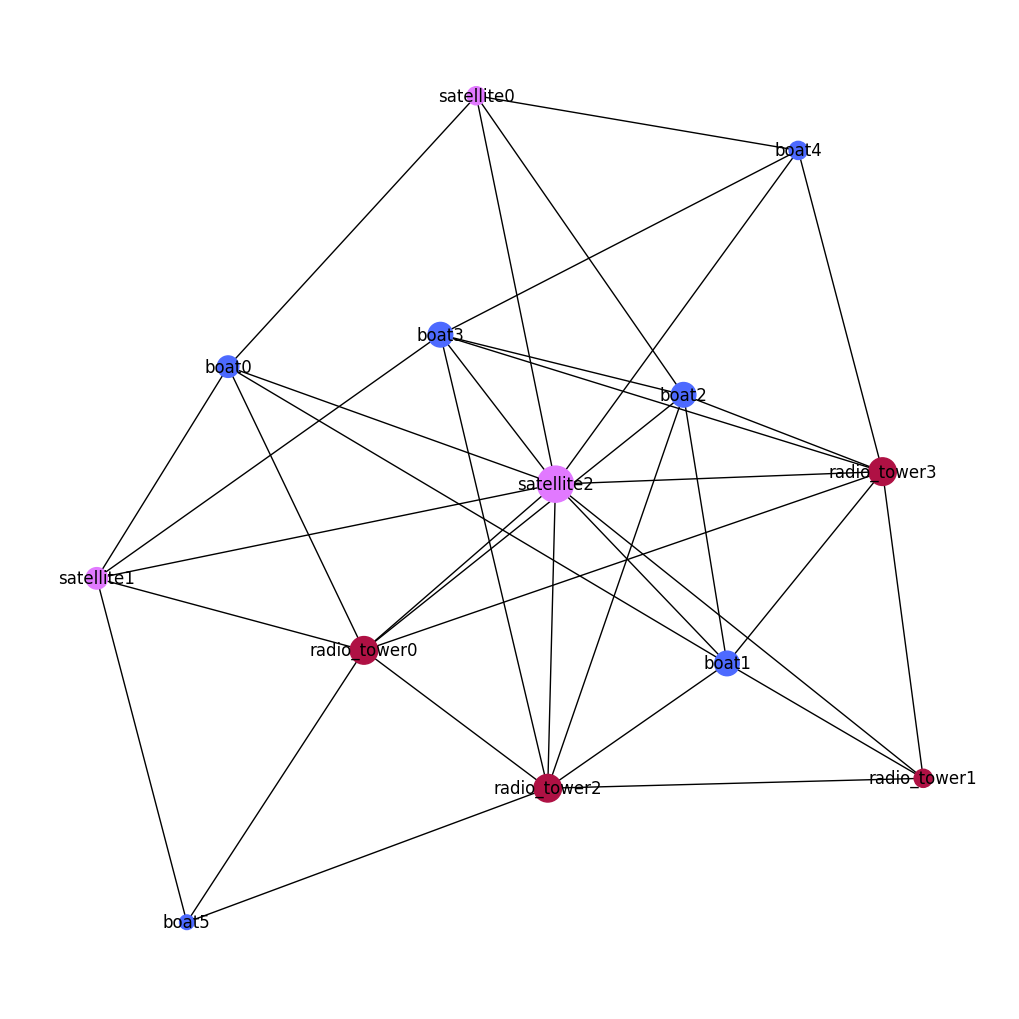

Closeness centrality


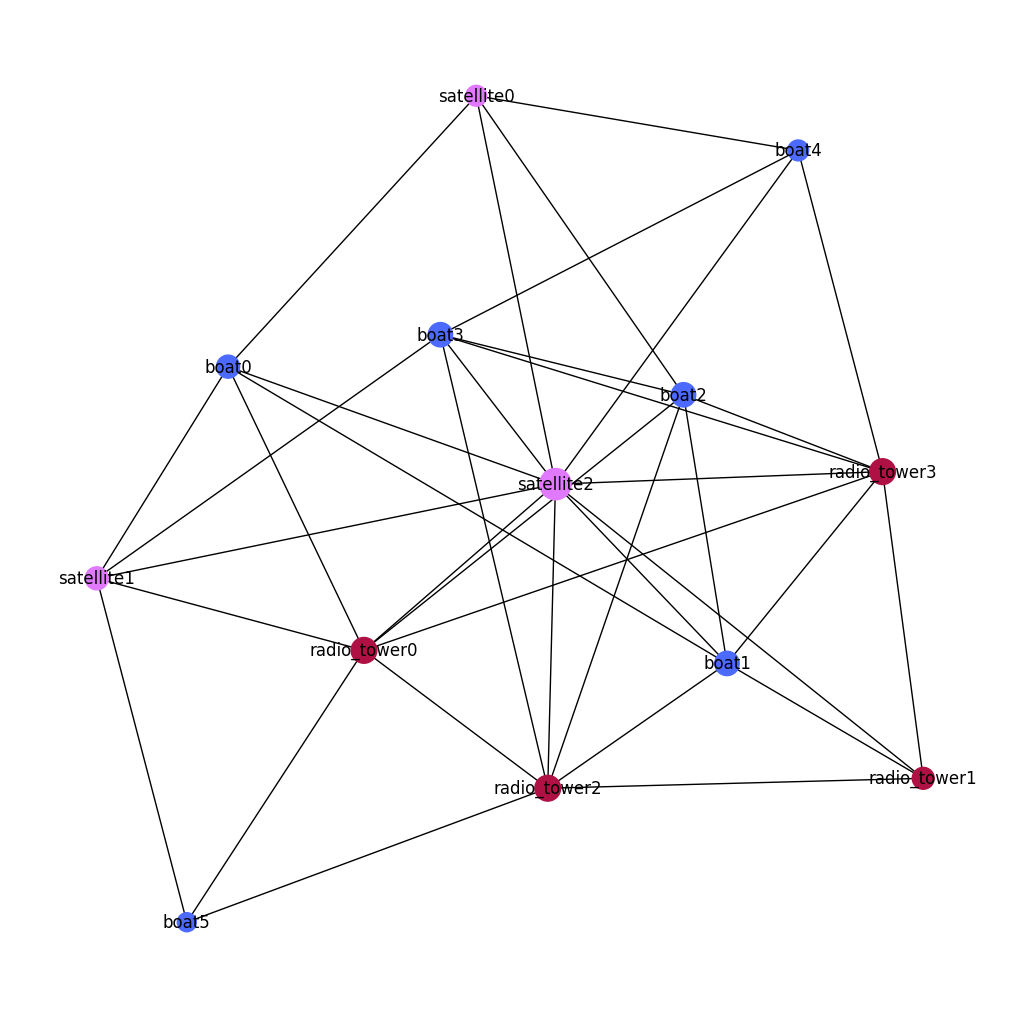

Betweenness centrality


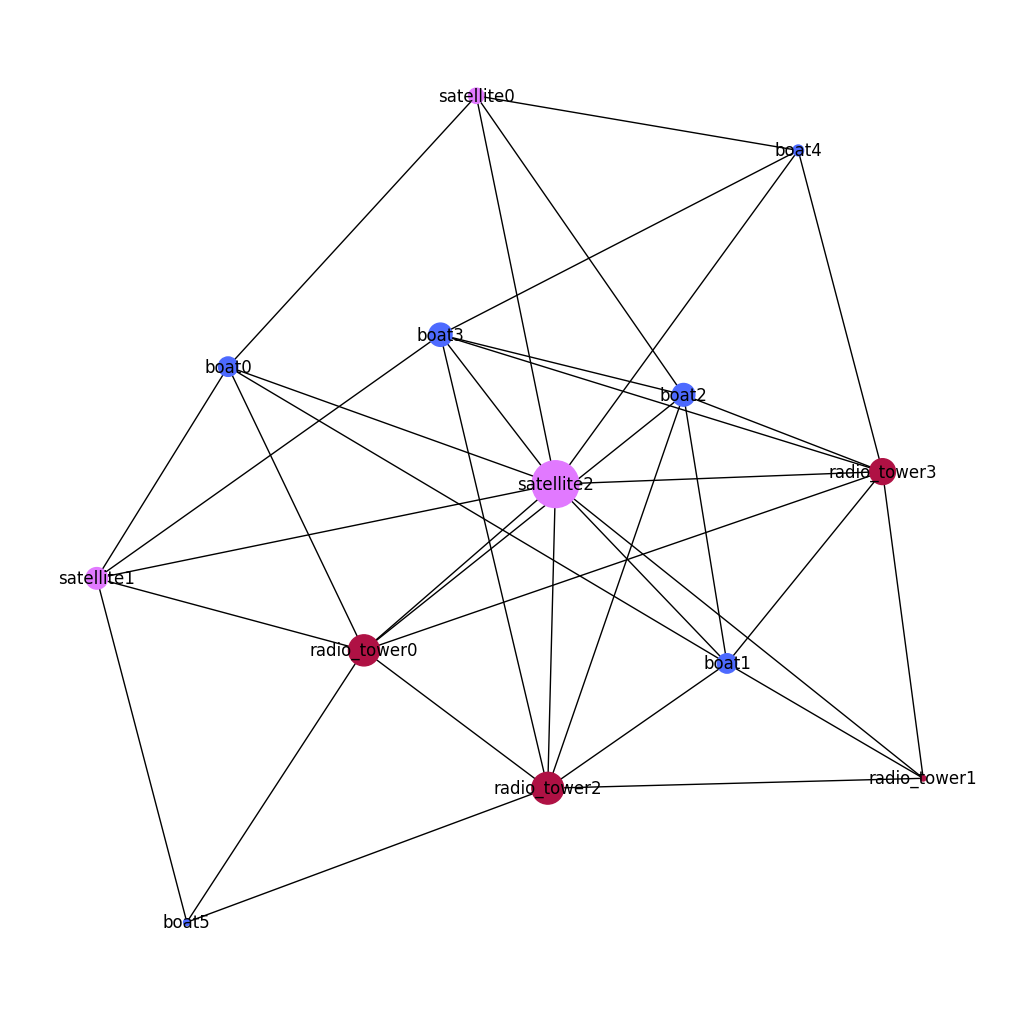

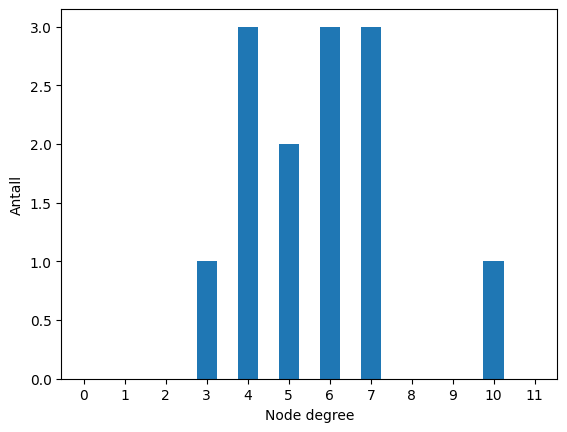

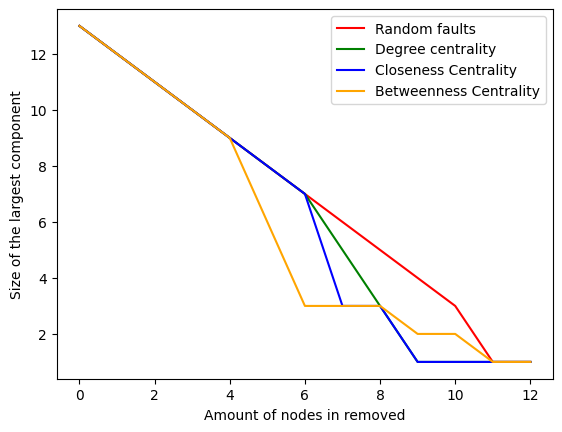

In [201]:
print("Degree centrality")
robust_vdes_graph.draw_degree_centrality()

print("Closeness centrality")
robust_vdes_graph.draw_closeness_centrality()

print("Betweenness centrality")
robust_vdes_graph.draw_betweenness_centrality()

robust_vdes_graph.histogram()

get_attack_graph(robust_vdes_graph)